<a href="https://colab.research.google.com/github/AmritRaj369/Data-analysis-projects/blob/main/Lognormal_Analytics_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis Project By Amrit Raj


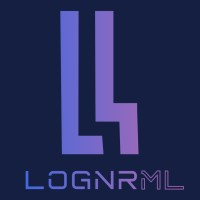

#Introduction
This project focuses on an in-depth analysis of weekly product-level sales data across three major categories—Electronics, Clothing, and Home Goods. The dataset captures key business indicators such as price, competitor pricing, advertising spend, customer reviews, social media mentions, weather conditions, and warehouse stock levels. The primary objective of the analysis is to uncover sales trends, evaluate the influence of various external and internal factors, and segment product performance based on pricing, customer sentiment, and marketing effort. By leveraging time-series analysis, segmentation techniques, and visual storytelling, the project aims to generate actionable insights that can guide strategic decisions around pricing, advertising optimization, and inventory planning.


**{Used AI for proper wordings and avoiding grammatical mistakes}**

#Column Profiling
Description of each column
* Week - Date at which sales took place.
* Product_id - Unique id of each product
* Product name - Name of product
* Price - Price of product
* Competitor Price  - price of product competitor selling at
* Pricing Currency - Currency of price at which items are sold (price and competitor price)
* Sales volume - quantity of the items sold
* Advertisement spend(in eur) - price spent at the advertisement of the product
* Customer Review - review given by customers
* Weather Index - "Weather Index indicates how favorable the weather was during each week, with higher values representing better conditions likely to support higher product sales.
* Social Media Mentions - Number of time product is mentioned on the social media platforms
* Warehouse Stock Level - Warehouse Stock Level reflects the available inventory of each product per week, influencing the ability to meet customer demand and fulfill sales.
* Market Share Rank -  indicates a product’s sales ranking within the market, with lower values representing higher market share and better relative performance.

**{Used AI to understand cols like weather index and market share rank}**


#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing Raw Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample B2C Dataset EDA.xlsx to Sample B2C Dataset EDA (3).xlsx


In [ ]:
file_path = r"/content/Sample B2C Dataset EDA.xlsx"
df = pd.read_excel(file_path)
#used AI to get confirmation if this code is correct or not

#Evaluating the structure of the dataset and Data preprocessing

In [ ]:
df.head(20)

,Week,Product ID,Category,Product Name,Price,Competitor Price,Pricing Currency,Sales Volume,Advertising Spend (EUR),Customer Reviews,Weather Index,Social Media Mentions,Warehouse Stock Level,Market Share Rank
0,2023-05-16 10:23:19.382,1,Electronics,Mobile Phone,487.45,509.42,EUR,65.0,3793.97,3.4,5,16,4079,1
1,2023-05-16 10:23:19.382,2,Electronics,Bluetooth Headphones,156.66,163.53,EUR,974.0,503.50,4.4,5,51,2072,3
2,2023-05-16 10:23:19.382,3,Electronics,Tablet,283.97,272.34,EUR,74.0,3282.74,4.1,5,62,2917,5
3,2023-05-16 10:23:19.382,4,Clothing,Luxury Jacket,435.91,456.21,EUR,686.0,4137.79,4.4,4,115,2208,1
4,2023-05-16 10:23:19.382,5,Clothing,Casual T-Shirt,30.66,31.68,EUR,193.0,1280.14,3.4,4,140,1122,4
5,2023-05-16 10:23:19.382,6,Clothing,Jeans,2625.60,2698.00,TRY,574.0,4727.75,3.8,5,254,3381,6
6,2023-05-16 10:23:19.382,7,Home Goods,Coffee Maker,4820.00,5042.40,TRY,149.0,4300.40,4.1,7,88,2596,1
7,2023-05-16 10:23:19.382,8,Home Goods,Coffee Filters,848.40,812.40,TRY,235.0,4940.99,4.2,4,0,3111,2
8,2023-05-16 10:23:19.382,9,Home Goods,Blender,4169.20,4290.00,TRY,72.0,3226.82,4.1,5,246,2331,5
9,2023-05-16 10:23:19.382,10,Home Goods,Vacuum Cleaner,7697.60,7563.20,TRY,971.0,3783.23,4.6,6,63,2796,7


##Evaluting the shape of the dataset

In [ ]:
df.shape[0]

1040

##Checking for null value percentage per column

In [ ]:
((df.isnull().sum())/df.shape[0]) * 100

,0
Week,0.000000
Product ID,0.000000
Category,0.000000
Product Name,0.000000
Price,0.000000
Competitor Price,0.000000
Pricing Currency,0.000000
Sales Volume,1.634615
Advertising Spend (EUR),1.923077
Customer Reviews,0.576923


##General Practice for null value imputation
* if the missing values are minimal (<5% of rows), dropping them is acceptable.
* for substantial missing values (>10% of rows), use a suitable imputation technique.
* if a column has over 50% of null values, drop that column (unless it's very crucial for the analysis).

But still we will perform data imputation in order to showcase our skill.

##Null Value Imputation For columns with null value

In [ ]:
cols_to_impute = ['Sales Volume', 'Advertising Spend (EUR)', 'Customer Reviews']
for col in cols_to_impute:
    df[col] = df.groupby('Product Name')[col].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.isnull().sum()

,0
Week,0
Product ID,0
Category,0
Product Name,0
Price,0
Competitor Price,0
Pricing Currency,0
Sales Volume,0
Advertising Spend (EUR),0
Customer Reviews,0


##Numeric Exploration of the dataset

In [ ]:
df.describe()

,Week,Product ID,Price,Competitor Price,Sales Volume,Advertising Spend (EUR),Customer Reviews,Weather Index,Social Media Mentions,Warehouse Stock Level,Market Share Rank
count,1040,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,2024-05-10 22:23:19.381999872,5.500000,2096.245673,2139.305558,494.417520,2696.527368,3.967944,4.517308,96.100962,2507.253846,3.500000
min,2023-05-16 10:23:19.382000,1.000000,-8704.800000,26.280000,10.000000,503.230000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2023-11-12 16:23:19.382000128,3.000000,295.677500,298.775000,249.750000,1589.415000,3.600000,3.000000,28.000000,1789.000000,1.000000
50%,2024-05-10 22:23:19.382000128,5.500000,543.205000,629.960000,488.500000,2676.660000,4.000000,4.000000,66.500000,2506.500000,3.500000
75%,2024-11-07 04:23:19.382000128,8.000000,3948.200000,3994.500000,735.000000,3770.580000,4.300000,7.000000,137.000000,3173.000000,5.000000
max,2025-05-06 10:23:19.382000,10.000000,8769.600000,9143.600000,1115.000000,4993.780000,6.000000,10.000000,585.000000,5000.000000,7.000000
std,NaN,2.873663,2565.831815,2546.464378,285.057993,1282.331018,0.616287,2.293584,93.524437,1039.184298,2.110517


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Week                     1040 non-null   datetime64[ns]
 1   Product ID               1040 non-null   int64         
 2   Category                 1040 non-null   object        
 3   Product Name             1040 non-null   object        
 4   Price                    1040 non-null   float64       
 5   Competitor Price         1040 non-null   float64       
 6   Pricing Currency         1040 non-null   object        
 7   Sales Volume             1040 non-null   float64       
 8   Advertising Spend (EUR)  1040 non-null   float64       
 9   Customer Reviews         1040 non-null   float64       
 10  Weather Index            1040 non-null   int64         
 11  Social Media Mentions    1040 non-null   int64         
 12  Warehouse Stock Level    1040 non-

##Removal of negative sign from price column

In [ ]:
df[df['Price']<0]

,Week,Product ID,Category,Product Name,Price,Competitor Price,Pricing Currency,Sales Volume,Advertising Spend (EUR),Customer Reviews,Weather Index,Social Media Mentions,Warehouse Stock Level,Market Share Rank
19,2023-05-23 10:23:19.382,10,Home Goods,Vacuum Cleaner,-8704.80,8615.60,TRY,925.0,3030.900882,4.00000,6,132,3426,7
210,2023-10-10 10:23:19.382,1,Electronics,Mobile Phone,-492.97,511.34,EUR,59.0,4288.700000,4.30000,5,61,1388,1
333,2024-01-02 10:23:19.382,4,Clothing,Luxury Jacket,-434.17,417.04,EUR,120.0,3939.980000,3.00000,4,30,1481,1
525,2024-05-14 10:23:19.382,6,Clothing,Jeans,-2342.80,2250.40,TRY,898.0,2891.110000,3.50000,6,163,1028,6
625,2024-07-23 10:23:19.382,6,Clothing,Jeans,-2376.40,2428.40,TRY,257.0,3138.060000,3.60000,6,62,2465,6
721,2024-10-01 10:23:19.382,2,Electronics,Bluetooth Headphones,-159.20,152.03,EUR,592.0,3215.320000,4.06699,6,1,2883,3
833,2024-12-17 10:23:19.382,4,Clothing,Luxury Jacket,-377.94,373.73,EUR,113.0,2371.950000,4.90000,2,71,2734,1
1031,2025-05-06 10:23:19.382,2,Electronics,Bluetooth Headphones,-140.58,135.32,EUR,434.0,1122.700000,3.50000,4,152,4152,3


In [ ]:
#checked all columns but found no columns with negative sign
df[df['Advertising Spend (EUR)']<0]

,Week,Product ID,Category,Product Name,Price,Competitor Price,Pricing Currency,Sales Volume,Advertising Spend (EUR),Customer Reviews,Weather Index,Social Media Mentions,Warehouse Stock Level,Market Share Rank


In [ ]:
df['Price'] = df['Price'].abs()

#Segment Influence Analysis

##Converting all pricing currency to Euro

In [ ]:
df[df['Pricing Currency'] == 'TRY'][['Price', 'Competitor Price']]

,Price,Competitor Price
5,2625.6,2698.0
6,4820.0,5042.4
7,848.4,812.4
8,4169.2,4290.0
9,7697.6,7563.2
...,...,...
1035,2288.0,2282.8
1036,4836.0,5075.6
1037,825.6,837.6
1038,4058.4,4231.2


In [ ]:
df[df['Pricing Currency'] == 'TRY'][['Price', 'Competitor Price']] * 0.021

,Price,Competitor Price
5,55.1376,56.6580
6,101.2200,105.8904
7,17.8164,17.0604
8,87.5532,90.0900
9,161.6496,158.8272
...,...,...
1035,48.0480,47.9388
1036,101.5560,106.5876
1037,17.3376,17.5896
1038,85.2264,88.8552


In [ ]:
df.loc[df['Pricing Currency'] == 'TRY',['Price', 'Competitor Price']] *= 0.021

##Changing Pricing Currency label from 'TRY' to 'EUR'

In [ ]:
df.loc[df['Pricing Currency'] == 'TRY', 'Pricing Currency']= 'EUR'

##Creating a column total sales

In [ ]:
df['total sales'] = (df['Sales Volume'] * df['Price']).round(2)

In [ ]:
df['total sales'].head()

,total sales
0,31684.25
1,152586.84
2,21013.78
3,299034.26
4,5917.38


##Total sales for different catagory

In [ ]:
df.groupby('Category')['total sales'].sum()

,total sales
Category,
Clothing,21967050.63
Electronics,46137826.71
Home Goods,18772028.71


In [ ]:
#percentage contribution in total sales
df_cat_sales_percentage = (
    (df.groupby('Category')['total sales'].sum() / df['total sales'].sum() * 100).round(2).astype(str) + '%'
)
df_cat_sales_percentage

,total sales
Category,
Clothing,25.29%
Electronics,53.11%
Home Goods,21.61%


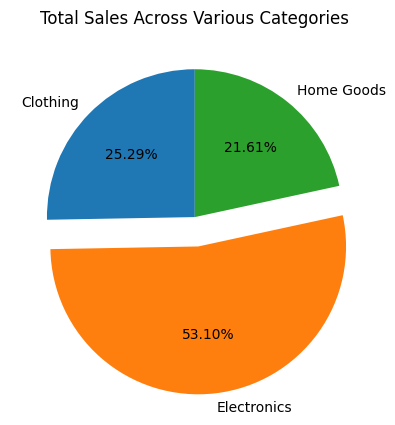

In [ ]:

df_cat_sales_pct = (
    df.groupby('Category')['total sales'].sum() / df['total sales'].sum() * 100
).round(2)

plt.pie(
    df_cat_sales_pct,
    labels=df_cat_sales_pct.index,
    startangle=90,
    explode=(0, 0.2, 0),
    autopct='%.2f%%'
)
plt.title('Total Sales Across Various Categories')
plt.show()


###Highest Selling product across each category

In [ ]:
df_product_level_sales = (
    (df.groupby(['Category', 'Product Name'])['total sales'].sum()/df.groupby('Category')['total sales'].sum() *100).round(2).astype(str) + '%'
)
df_product_level_sales

Category     Product Name        
Clothing     Casual T-Shirt           7.39%
             Jeans                   12.69%
             Luxury Jacket           79.93%
Electronics  Bluetooth Headphones    15.52%
             Mobile Phone            52.34%
             Tablet                  32.14%
Home Goods   Blender                 22.95%
             Coffee Filters           5.42%
             Coffee Maker            25.26%
             Vacuum Cleaner          46.37%
Name: total sales, dtype: object

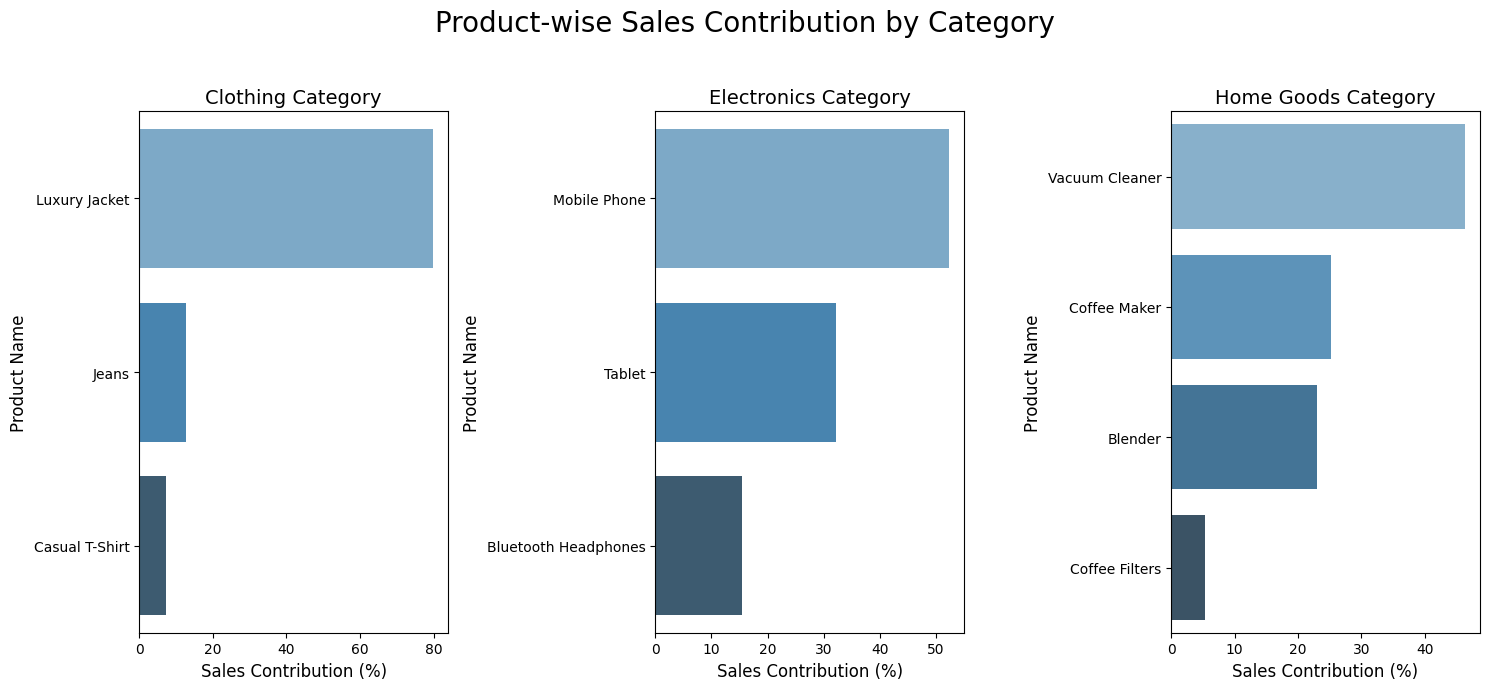

In [ ]:

product_sales = df.groupby(['Category', 'Product Name'])['total sales'].sum().reset_index()
category_totals = df.groupby('Category')['total sales'].sum().reset_index().rename(columns={'total sales': 'category_total'})
df_pct = pd.merge(product_sales, category_totals, on='Category')
df_pct['sales_pct'] = (df_pct['total sales'] / df_pct['category_total'] * 100).round(2)

categories = df_pct['Category'].unique()

plt.figure(figsize=(15, 7))
plt.suptitle("Product-wise Sales Contribution by Category", fontsize=20)

for i, cat in enumerate(categories, 1):
    plt.subplot(1, 3, i)
    data = df_pct[df_pct['Category'] == cat].sort_values('sales_pct', ascending=False)
    sns.barplot(y='Product Name', x='sales_pct', data=data, palette='Blues_d')
    plt.title(f"{cat} Category", fontsize=14)
    plt.xlabel("Sales Contribution (%)", fontsize=12)
    plt.ylabel("Product Name", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#{Used AI get the list of color pallettes codes for this graph}


###Segmentation of dataset on the basis of price

In [ ]:
df['Price Segment'] = pd.qcut(df['Price'], q=3, labels=['Low Price', 'Mid Price', 'High Price'])

In [ ]:
seg_cat_sales = df.groupby(['Price Segment', 'Category'])['total sales'].sum()
seg_cat_sales

Price Segment  Category   
Low Price      Clothing        4409504.15
               Electronics           0.00
               Home Goods      2130953.53
Mid Price      Clothing              0.00
               Electronics     7161140.66
               Home Goods     13570044.62
High Price     Clothing       17557546.48
               Electronics    38976686.05
               Home Goods      3071030.56
Name: total sales, dtype: float64

In [ ]:
(seg_cat_sales/df.groupby('Price Segment')['total sales'].sum())*100

Price Segment  Category   
Low Price      Clothing       67.418893
               Electronics     0.000000
               Home Goods     32.581107
Mid Price      Clothing        0.000000
               Electronics    34.542842
               Home Goods     65.457158
High Price     Clothing       29.456369
               Electronics    65.391350
               Home Goods      5.152281
Name: total sales, dtype: float64

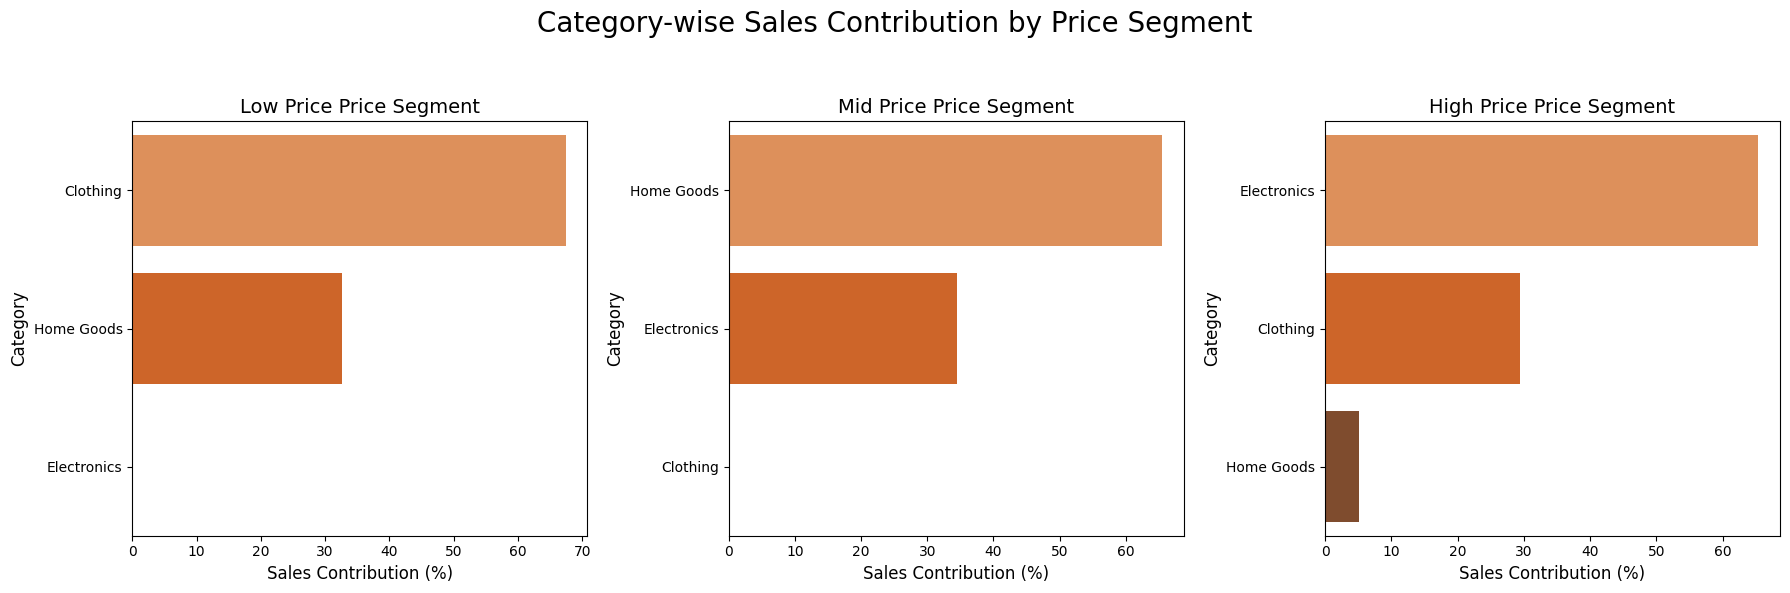

In [ ]:
price_cat_seg = df.groupby(['Price Segment', 'Category'])['total sales'].sum().reset_index()
Price_Segment_totals = df.groupby('Price Segment')['total sales'].sum().reset_index().rename(columns={'total sales': 'Price_Segment_total'})
df_pct = pd.merge(price_cat_seg, Price_Segment_totals, on='Price Segment')
df_pct['sales_pct'] = (df_pct['total sales'] / df_pct['Price_Segment_total'] * 100).round(2)
Price_Segments = df_pct['Price Segment'].unique()

plt.figure(figsize=(18, 6))
plt.suptitle("Category-wise Sales Contribution by Price Segment", fontsize=20)

for i, ps in enumerate(Price_Segments, 1):
    plt.subplot(1, 3, i)
    data = df_pct[df_pct['Price Segment'] == ps].sort_values('sales_pct', ascending=False)
    sns.barplot(x='sales_pct', y='Category', data=data, palette='Oranges_d')
    plt.title(f"{ps} Price Segment", fontsize=14)
    plt.xlabel("Sales Contribution (%)", fontsize=12)
    plt.ylabel("Category", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
#{Used AI get the list of color pallettes codes for this graph}

###Segmentation of dataset on the basis of price Advertising Spend (EUR)

In [ ]:
df_ad_budget = df.groupby('Category')['Advertising Spend (EUR)'].sum().round(2).reset_index()
df_ad_budget.sort_values('Advertising Spend (EUR)', ascending=False)

,Category,Advertising Spend (EUR)
2,Home Goods,1140879.88
0,Clothing,844740.97
1,Electronics,818767.60


In [ ]:
df_cat_sales = df.groupby('Category')['total sales'].sum().round(2).reset_index()
df_cat_sales.sort_values('total sales', ascending=False)

,Category,total sales
1,Electronics,46137826.71
0,Clothing,21967050.63
2,Home Goods,18772028.71


In [ ]:
df_profit = df_ad_budget.merge(df_cat_sales, on="Category")
df_profit['ad_Profit'] = df_profit['total sales'] - df_profit['Advertising Spend (EUR)']
df_profit.sort_values('ad_Profit', ascending=False)

,Category,Advertising Spend (EUR),total sales,ad_Profit
1,Electronics,818767.60,46137826.71,45319059.11
0,Clothing,844740.97,21967050.63,21122309.66
2,Home Goods,1140879.88,18772028.71,17631148.83


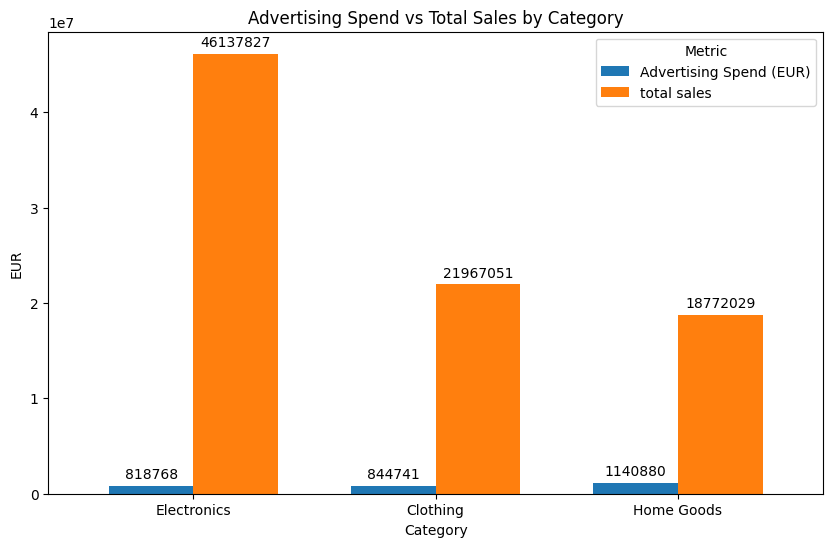

In [ ]:
df_plot = df_profit.sort_values('total sales', ascending=False)
plot_data = df_plot.set_index('Category')[['Advertising Spend (EUR)', 'total sales']]

ax = plot_data.plot(kind='bar', figsize=(10, 6), width=0.7)
plt.title('Advertising Spend vs Total Sales by Category')
plt.ylabel('EUR')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.legend(title='Metric')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
    #{Used AI get the list of color pallettes codes for this graph}

<Axes: title={'center': 'Ad Profit by Category'}, xlabel='Category'>

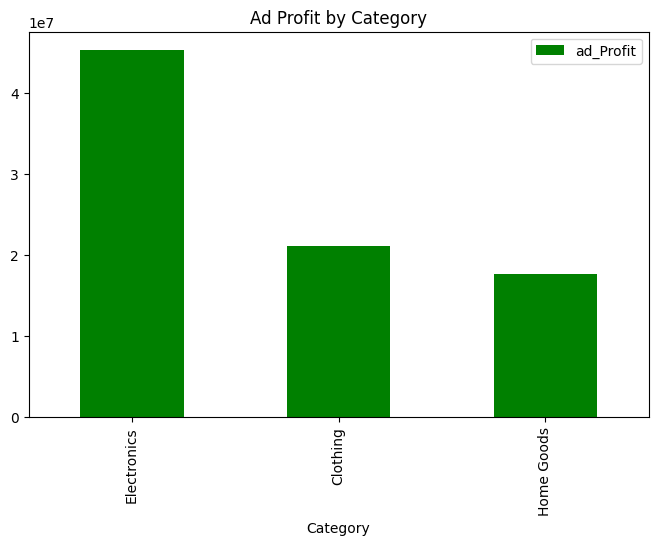

In [ ]:
df_plot.plot(
    x='Category', y='ad_Profit', kind='bar',
    color='green', figsize=(8,5), title='Ad Profit by Category'
)


###Segmentation on the basis of customer reviews

In [ ]:
df_review_chart = df.groupby(['Category', 'Product Name'])['Customer Reviews'].mean().round(2)
#df_review_chart.sort_values('Customer Reviews', ascending=False)
df_review_chart

Category     Product Name        
Clothing     Casual T-Shirt          3.99
             Jeans                   3.96
             Luxury Jacket           4.04
Electronics  Bluetooth Headphones    4.07
             Mobile Phone            3.91
             Tablet                  3.84
Home Goods   Blender                 3.95
             Coffee Filters          3.90
             Coffee Maker            3.99
             Vacuum Cleaner          4.04
Name: Customer Reviews, dtype: float64

In [ ]:
df_price_chart = df.groupby(['Category', 'Product Name'])['Price'].sum().round(2)
#df_review_chart.sort_values('Customer Reviews', ascending=False)
df_price_chart/df.groupby('Category')['Price'].sum().round(2)*100

Category     Product Name        
Clothing     Casual T-Shirt           6.146218
             Jeans                   10.479922
             Luxury Jacket           83.373860
Electronics  Bluetooth Headphones    15.675788
             Mobile Phone            52.974342
             Tablet                  31.349870
Home Goods   Blender                 22.770049
             Coffee Filters           4.573125
             Coffee Maker            27.189276
             Vacuum Cleaner          45.467550
Name: Price, dtype: float64

In [ ]:
df_cat_sales.sort_values('total sales', ascending=False)

,Category,total sales
1,Electronics,46137826.71
0,Clothing,21967050.63
2,Home Goods,18772028.71


## Segemntation on the basis of Weather Index col

### Analyzing the data distribution of weather index column

In [ ]:
df_weather_index = df.groupby('Category')['Weather Index'].mean().round(2).reset_index()
df_weather_index.sort_values('Weather Index', ascending=True)

,Category,Weather Index
1,Electronics,4.49
2,Home Goods,4.52
0,Clothing,4.55


<Axes: ylabel='Weather Index'>

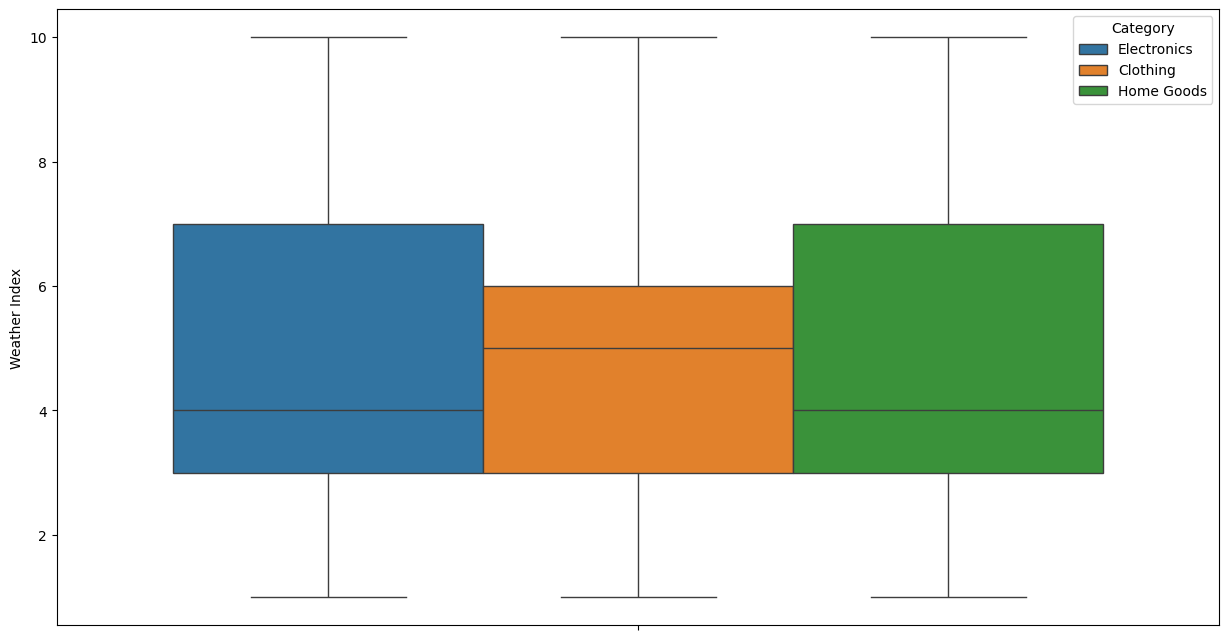

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(y='Weather Index',hue='Category',data = df)

In [ ]:
df_weather_index = df.groupby('Category')['Weather Index'].median().round(2).reset_index()
df_weather_index.sort_values('Weather Index', ascending=True)

,Category,Weather Index
1,Electronics,4.0
2,Home Goods,4.0
0,Clothing,5.0


In [ ]:
df['Weather Index'].describe()

,Weather Index
count,1040.000000
mean,4.517308
std,2.293584
min,1.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,10.000000


In [ ]:
df['Customer Reviews'].describe()

,Customer Reviews
count,1040.000000
mean,3.967944
std,0.616287
min,0.000000
25%,3.600000
50%,4.000000
75%,4.300000
max,6.000000


In [ ]:
df[df['Customer Reviews'] == 6]

,Week,Product ID,Category,Product Name,Price,Competitor Price,Pricing Currency,Sales Volume,Advertising Spend (EUR),Customer Reviews,Weather Index,Social Media Mentions,Warehouse Stock Level,Market Share Rank,total sales,Price Segment
145,2023-08-22 10:23:19.382,6,Clothing,Jeans,53.9700,53.9280,EUR,665.0,1612.54,6.0,7,72,3562,6,35890.05,Low Price
219,2023-10-10 10:23:19.382,10,Home Goods,Vacuum Cleaner,177.6432,170.7468,EUR,336.0,2101.88,6.0,4,205,2463,7,59688.12,High Price
489,2024-04-16 10:23:19.382,10,Home Goods,Vacuum Cleaner,177.5760,173.5608,EUR,515.0,4603.18,6.0,3,110,2348,7,91451.64,High Price
855,2024-12-31 10:23:19.382,6,Clothing,Jeans,53.1972,54.4656,EUR,61.0,4518.34,6.0,4,53,0,6,3245.03,Low Price


### Segementation of weather column

In [ ]:
weather_bin = [0, 5, 10]
weather_label = ['favourable', 'unfavourable']
df['Weather Index Lable'] = pd.cut(df['Weather Index'], bins=weather_bin, labels=weather_label)

In [ ]:
df_weather = df.groupby(['Category', 'Weather Index Lable'])['Customer Reviews'].mean().round(2).reset_index()
df_weather.sort_values('Customer Reviews', ascending=False)

,Category,Weather Index Lable,Customer Reviews
5,Home Goods,unfavourable,4.02
0,Clothing,favourable,4.01
2,Electronics,favourable,3.98
1,Clothing,unfavourable,3.97
4,Home Goods,favourable,3.94
3,Electronics,unfavourable,3.87


###Segemntation On the basis of Social Media Mentions

### Analyzing the data distribution of  Social Media Mentions column

In [ ]:
df['Social Media Mentions'].describe()

,Social Media Mentions
count,1040.000000
mean,96.100962
std,93.524437
min,0.000000
25%,28.000000
50%,66.500000
75%,137.000000
max,585.000000


<Axes: ylabel='Social Media Mentions'>

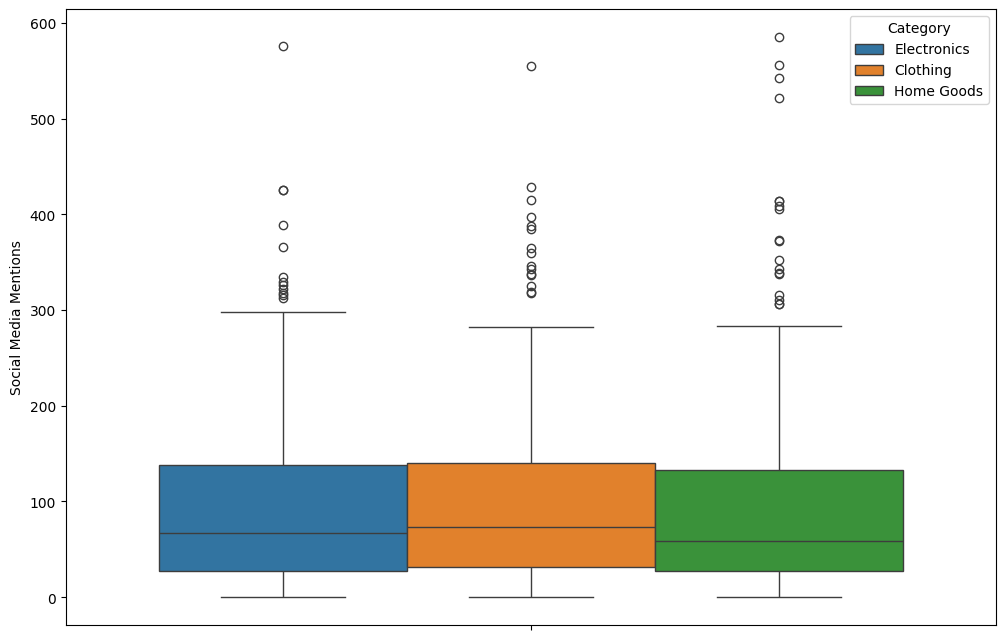

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Social Media Mentions',hue='Category',data = df)

<Axes: ylabel='Customer Reviews'>

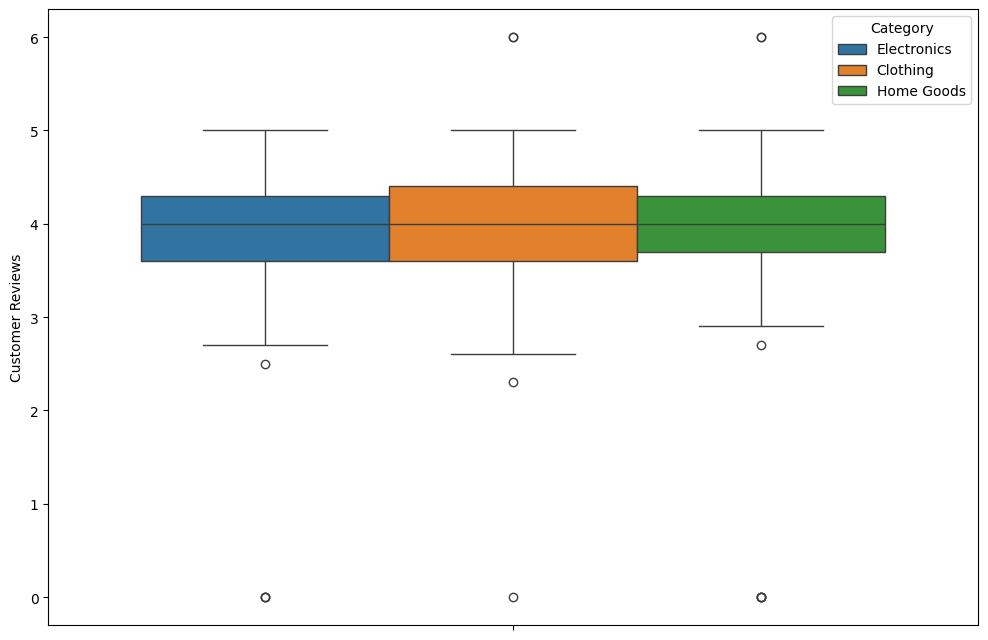

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Customer Reviews',hue='Category',data = df)

Here we can see that the  Social Media Mentions column has some outliers, we need to remove those outlier in order to have a fair analysis

In [ ]:
#creating a new dataframe for the outlier clean up of  Social Media Mentions column
df_sm_mentions =  df[['Week','Category', 'Product Name', 'Customer Reviews', 'Price', 'Sales Volume','Advertising Spend (EUR)','Social Media Mentions']]
df_sm_mentions

,Week,Category,Product Name,Customer Reviews,Price,Sales Volume,Advertising Spend (EUR),Social Media Mentions
0,2023-05-16 10:23:19.382,Electronics,Mobile Phone,3.400000,487.4500,65.0,3793.97,16
1,2023-05-16 10:23:19.382,Electronics,Bluetooth Headphones,4.400000,156.6600,974.0,503.50,51
2,2023-05-16 10:23:19.382,Electronics,Tablet,4.100000,283.9700,74.0,3282.74,62
3,2023-05-16 10:23:19.382,Clothing,Luxury Jacket,4.400000,435.9100,686.0,4137.79,115
4,2023-05-16 10:23:19.382,Clothing,Casual T-Shirt,3.400000,30.6600,193.0,1280.14,140
...,...,...,...,...,...,...,...,...
1035,2025-05-06 10:23:19.382,Clothing,Jeans,3.400000,48.0480,470.0,4201.86,114
1036,2025-05-06 10:23:19.382,Home Goods,Coffee Maker,3.200000,101.5560,104.0,2295.99,49
1037,2025-05-06 10:23:19.382,Home Goods,Coffee Filters,4.100000,17.3376,538.0,648.73,3
1038,2025-05-06 10:23:19.382,Home Goods,Blender,3.949515,85.2264,312.0,3404.06,153


Using IQR method for removal of outliers

In [ ]:
# obtain the first quartile
Q1 = df_sm_mentions['Social Media Mentions'].quantile(0.25)

# obtain the third quartile
Q3 = df_sm_mentions['Social Media Mentions'].quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

109.0


In [ ]:
df_sm_mentions.shape

(1040, 8)

In [ ]:
df_sm_mentions_new = df_sm_mentions[~((df_sm_mentions['Social Media Mentions'] < (Q1-1.5*IQR))|(df_sm_mentions['Social Media Mentions'] > (Q3 + 1.5*IQR)))]

In [ ]:
df_sm_mentions_new.shape

(995, 8)

We have removed the outliers successfully

### Segmentation of Social Media Mentions col.

In [ ]:
df_sm_mentions_new['sm_segment'] = pd.qcut(df_sm_mentions_new['Social Media Mentions'], q=3, labels=['Less Mentioned', 'Mid mentioned', 'Highly Mentioned'])

In [ ]:
df_mention_chart = df_sm_mentions_new.groupby(['Category', 'sm_segment'])['Customer Reviews'].mean().round(2)

In [ ]:
df_mention_chart

Category     sm_segment      
Clothing     Less Mentioned      4.02
             Mid mentioned       4.04
             Highly Mentioned    3.94
Electronics  Less Mentioned      3.99
             Mid mentioned       3.93
             Highly Mentioned    3.94
Home Goods   Less Mentioned      4.00
             Mid mentioned       3.95
             Highly Mentioned    3.96
Name: Customer Reviews, dtype: float64

In [ ]:
df_sm_mentions_new.groupby('Category')[['Sales Volume', 'Social Media Mentions', 'Advertising Spend (EUR)' ]].sum().round(2)

,Sales Volume,Social Media Mentions,Advertising Spend (EUR)
Category,,,
Clothing,146338.87,25199,803179.38
Electronics,143193.39,25064,788988.94
Home Goods,201898.76,32424,1099526.93


##Final Insights
* In low pricing product most sales came from clothing 67% followed home goods 33%.
* In mid pricing product most sales came from Home good 65% followed by electronics 35%.
* In high pricing product most sales came from electronics 65% followed by home good at 29 percent.


* Contribution of electronic towards total sales is the Highest. Electronic contribute approx 53% in the total sales followed by clothing at 26% and home goods at lowest with 21.615

* In electronics highest selling product is Mobile Phone followed by tablet. Similarly in home good and clothing highest selling products are Vaccum cleaner and luxury jackets respectively

* Electronics made has highest ad profit i.e. electronics items are sold the most with least advertisement budget followed by Clothing
* Home good items has the highest ad budget but least sales out of the 3 categories.
* Both in clothing and home goods category the product with highest rating are the most sold items with highest pricing
* In electronics mobile phones are the 2nd beat rated product yet the most sold item in electronics category.
It is clearly visible that poor reviews are directly proportion to the quality of weather index. That means weather index is affecting customer experience of the product
* Whenever any product in a category is highly mentioned its review falls down. Product with least mentions in any catagory has high customer review.
* Category with high advertisement budgets has high social meadia mentions

#Trend Detection

In [ ]:
df['Week'].unique()

<DatetimeArray>
['2023-05-16 10:23:19.382000', '2023-05-23 10:23:19.382000',
 '2023-05-30 10:23:19.382000', '2023-06-06 10:23:19.382000',
 '2023-06-13 10:23:19.382000', '2023-06-20 10:23:19.382000',
 '2023-06-27 10:23:19.382000', '2023-07-04 10:23:19.382000',
 '2023-07-11 10:23:19.382000', '2023-07-18 10:23:19.382000',
 ...
 '2025-03-04 10:23:19.382000', '2025-03-11 10:23:19.382000',
 '2025-03-18 10:23:19.382000', '2025-03-25 10:23:19.382000',
 '2025-04-01 10:23:19.382000', '2025-04-08 10:23:19.382000',
 '2025-04-15 10:23:19.382000', '2025-04-22 10:23:19.382000',
 '2025-04-29 10:23:19.382000', '2025-05-06 10:23:19.382000']
Length: 104, dtype: datetime64[ns]

##Total Sales Trend Analysis

###Quaterly trend Analysis of total sales

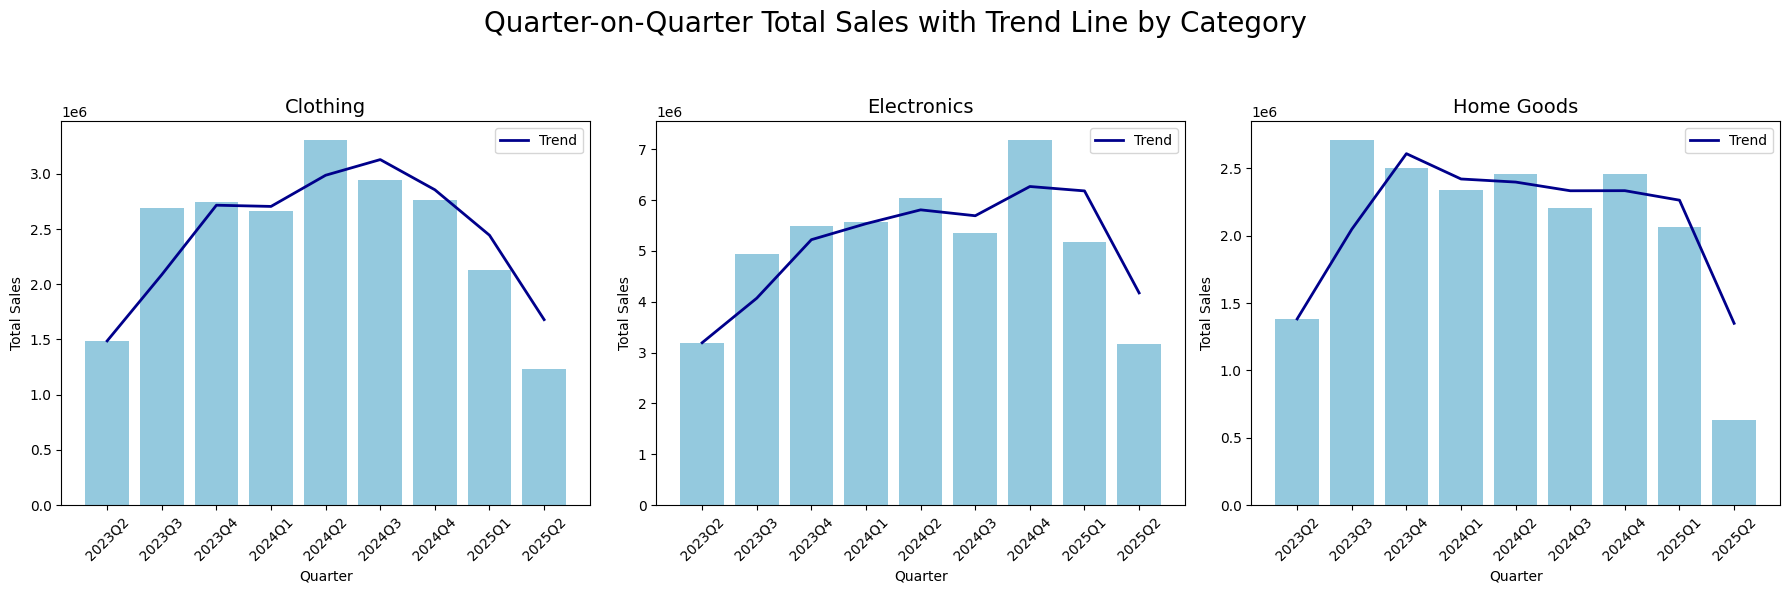

In [ ]:
df['Week'] = pd.to_datetime(df['Week'])
df['YearQuarter'] = df['Week'].dt.to_period('Q').astype(str)
df_quarterly = df.groupby(['Category', 'YearQuarter'])['total sales'].sum().reset_index()
df_quarterly = df_quarterly.sort_values(['Category', 'YearQuarter'])
categories = df_quarterly['Category'].unique()
plt.figure(figsize=(18, 6))
plt.suptitle("Quarter-on-Quarter Total Sales with Trend Line by Category", fontsize=20)

for i, cat in enumerate(categories, 1):
    plt.subplot(1, 3, i)

    cat_data = df_quarterly[df_quarterly['Category'] == cat].copy()
    cat_data['RollingAvg'] = cat_data['total sales'].rolling(window=2, min_periods=1).mean()

 # Bar chart
    sns.barplot(x='YearQuarter', y='total sales', data=cat_data, color='skyblue')

 # Line chart (trend)
    plt.plot(cat_data['YearQuarter'], cat_data['RollingAvg'], color='darkblue', linewidth=2, label='Trend')

    plt.title(f"{cat}", fontsize=14)
    plt.xlabel("Quarter")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
#was getting an error in this code, used AI for debugging

###Yearly trend Analysis of total sales

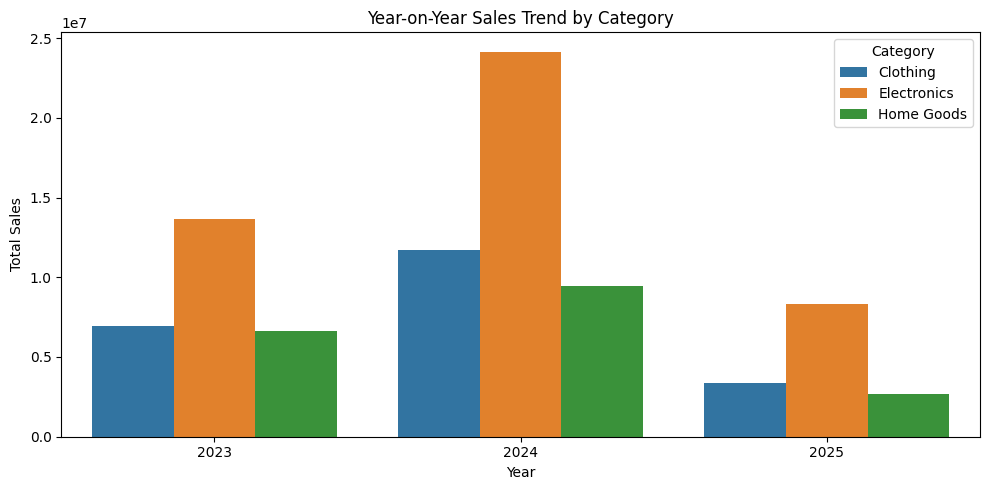

In [ ]:
df['Week'] = pd.to_datetime(df['Week'])
df['Year'] = df['Week'].dt.year.astype(str)
df_yearly = df.groupby(['Year', 'Category'])['total sales'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=df_yearly, x='Year', y='total sales', hue='Category')
plt.title("Year-on-Year Sales Trend by Category")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [ ]:
df['Week'] = pd.to_datetime(df['Week'])
df['YearQuarter'] = df['Week'].dt.to_period('Q').astype(str)
df['Year'] = df['Week'].dt.year.astype(str)
def plot_trend(df, value_col, ylabel):
    categories = df['Category'].unique()
    df_quarter = df.groupby(['Category', 'YearQuarter'])[value_col].mean().reset_index()
    df_quarter = df_quarter.sort_values(['Category', 'YearQuarter'])

    plt.figure(figsize=(18, 6))
    plt.suptitle(f"Quarter-on-Quarter Trend of {ylabel} by Category", fontsize=20)

    for i, cat in enumerate(categories, 1):
        plt.subplot(1, 3, i)
        cat_data = df_quarter[df_quarter['Category'] == cat].copy()
        cat_data['RollingAvg'] = cat_data[value_col].rolling(window=2, min_periods=1).mean()

        sns.barplot(x='YearQuarter', y=value_col, data=cat_data, color='skyblue')
        plt.plot(cat_data['YearQuarter'], cat_data['RollingAvg'], color='darkblue', linewidth=2, label='Trend')
        plt.title(f"{cat}", fontsize=14)
        plt.xlabel("Quarter")
        plt.ylabel(ylabel)
        plt.xticks(rotation=45)
        plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()
    df_year = df.groupby(['Category', 'Year'])[value_col].mean().reset_index()
    df_year = df_year.sort_values(['Category', 'Year'])

    plt.figure(figsize=(18, 6))
    plt.suptitle(f"Year-on-Year Trend of {ylabel} by Category", fontsize=20)

    for i, cat in enumerate(categories, 1):
        plt.subplot(1, 3, i)
        cat_data = df_year[df_year['Category'] == cat].copy()
        cat_data['RollingAvg'] = cat_data[value_col].rolling(window=2, min_periods=1).mean()

        sns.barplot(x='Year', y=value_col, data=cat_data, color='lightgreen')
        plt.plot(cat_data['Year'], cat_data['RollingAvg'], color='darkgreen', linewidth=2, label='Trend')
        plt.title(f"{cat}", fontsize=14)
        plt.xlabel("Year")
        plt.ylabel(ylabel)
        plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


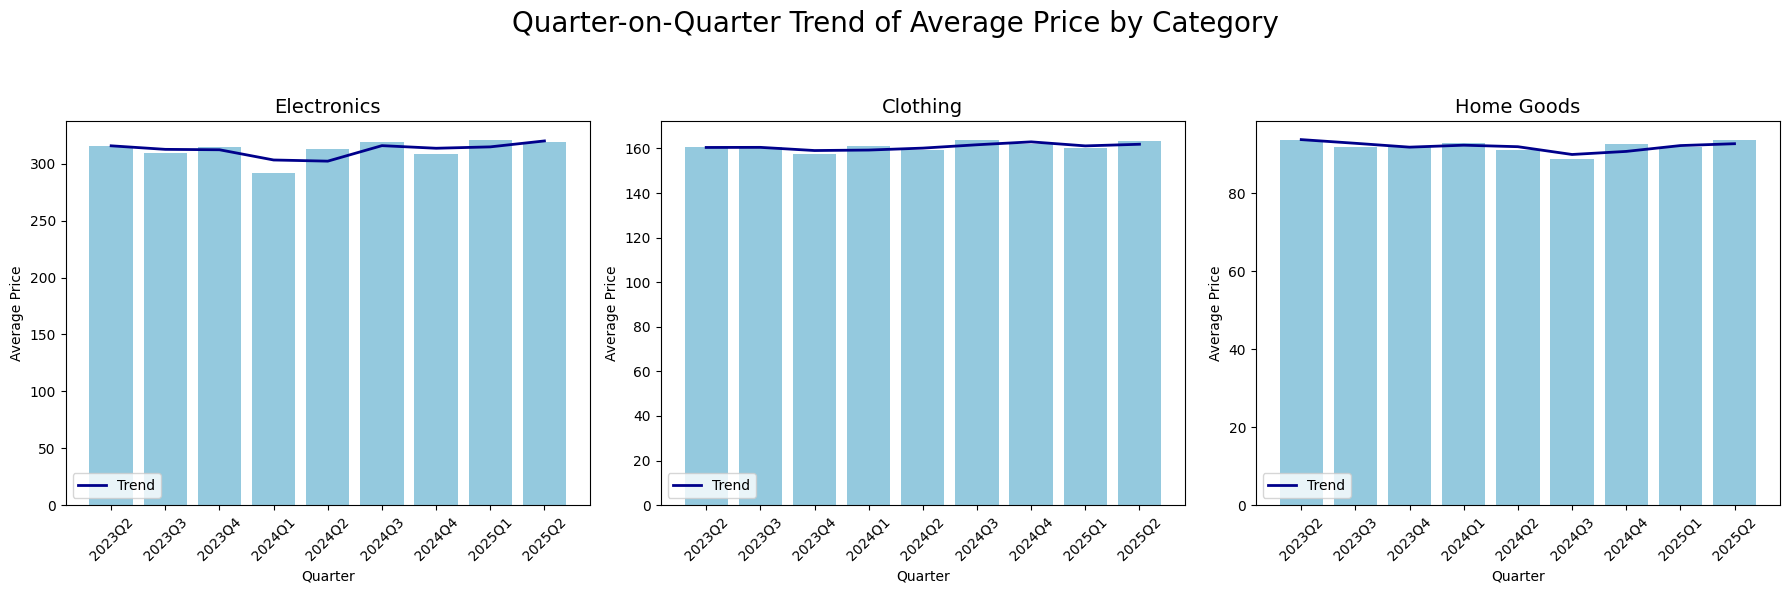

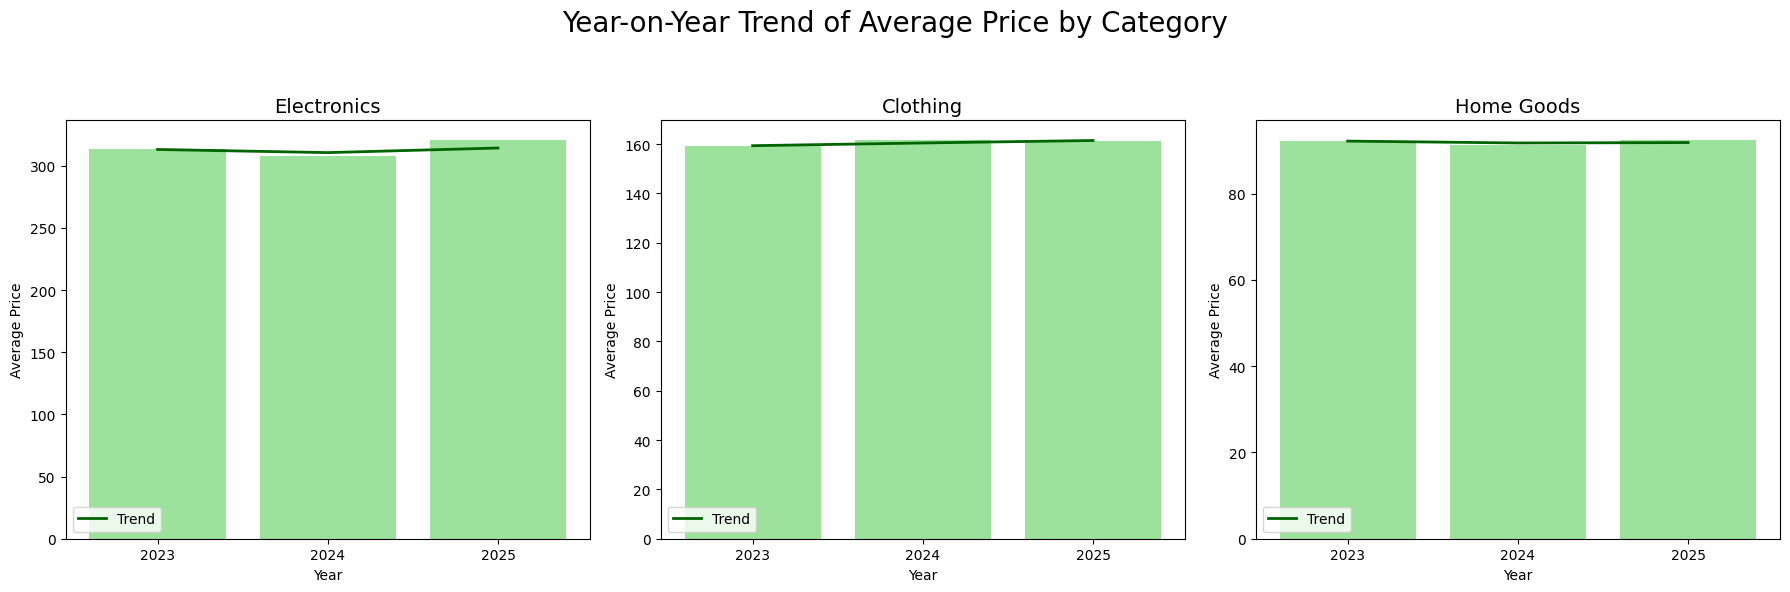

In [ ]:
plot_trend(df, 'Price', 'Average Price')


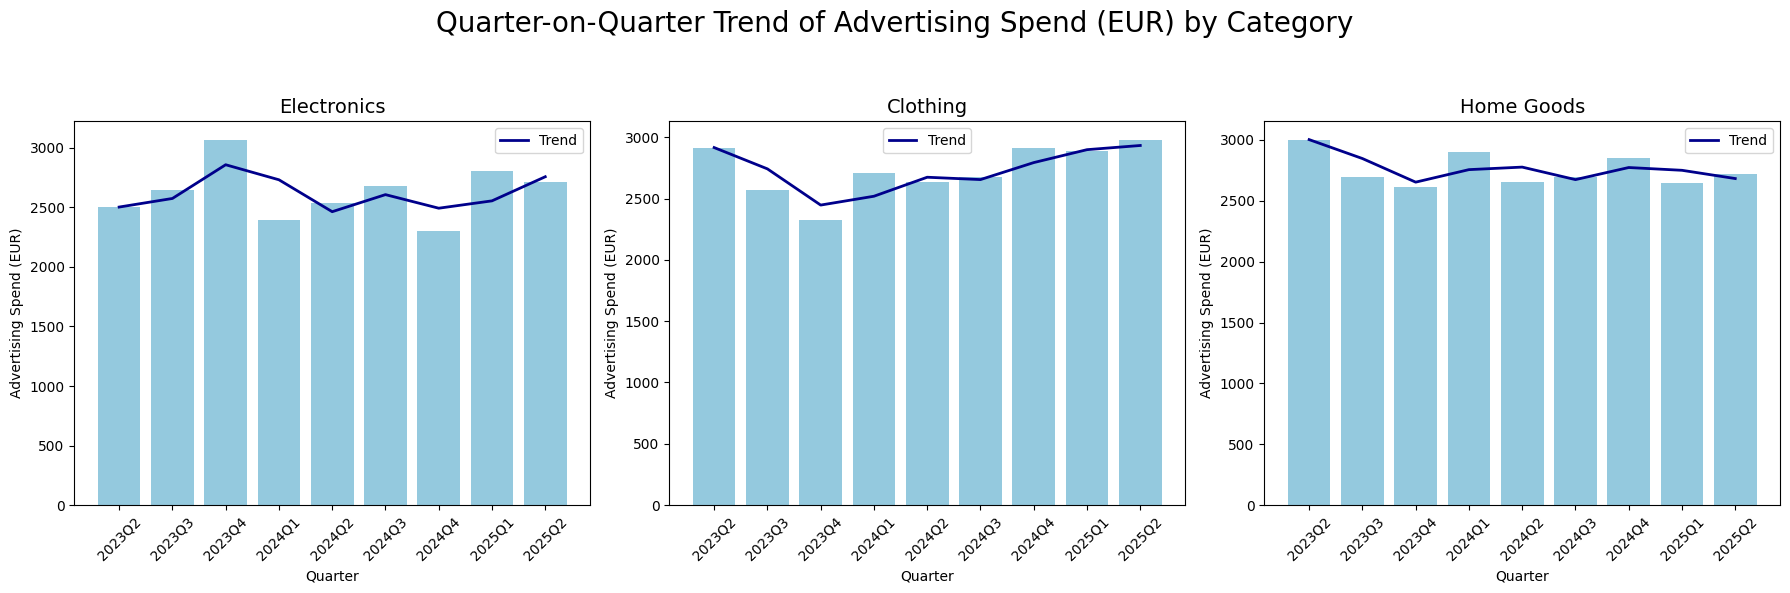

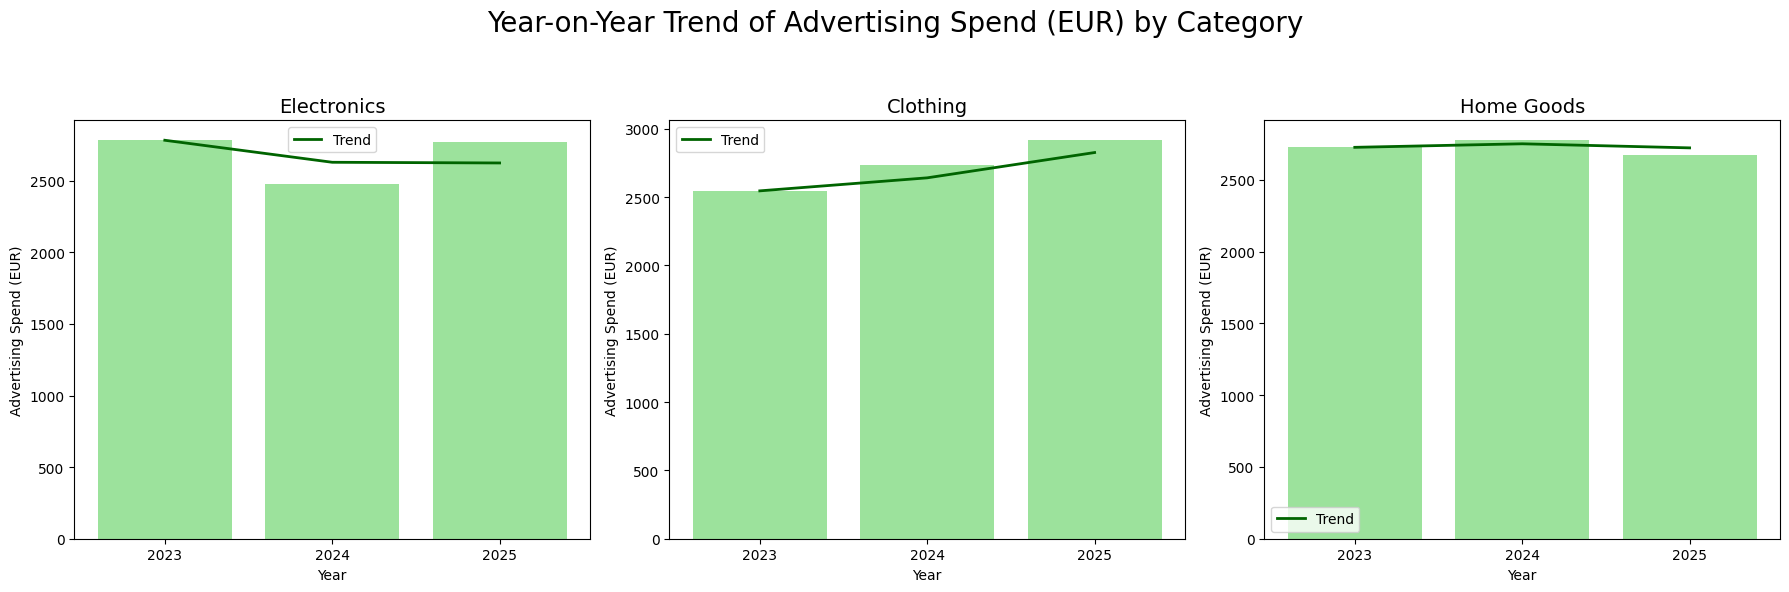

In [ ]:
plot_trend(df, 'Advertising Spend (EUR)', 'Advertising Spend (EUR)')


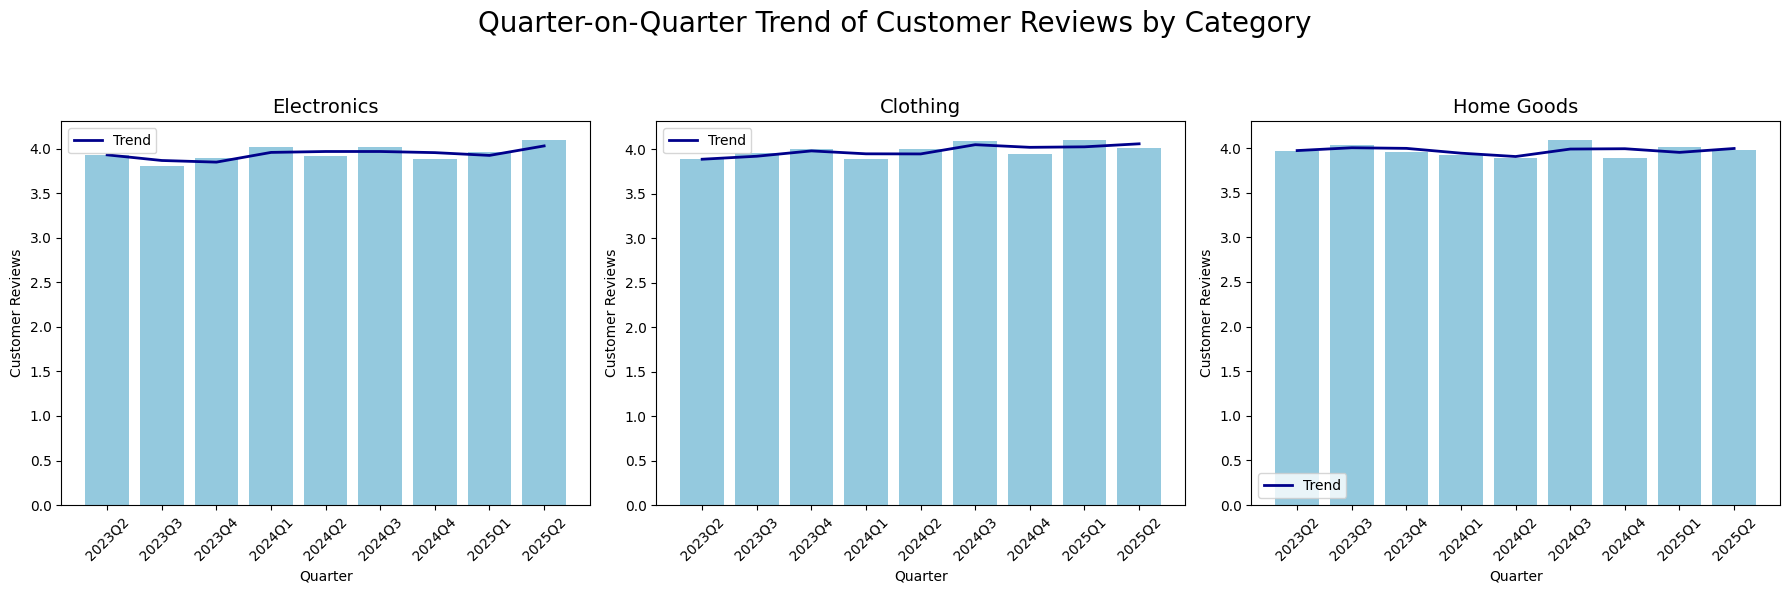

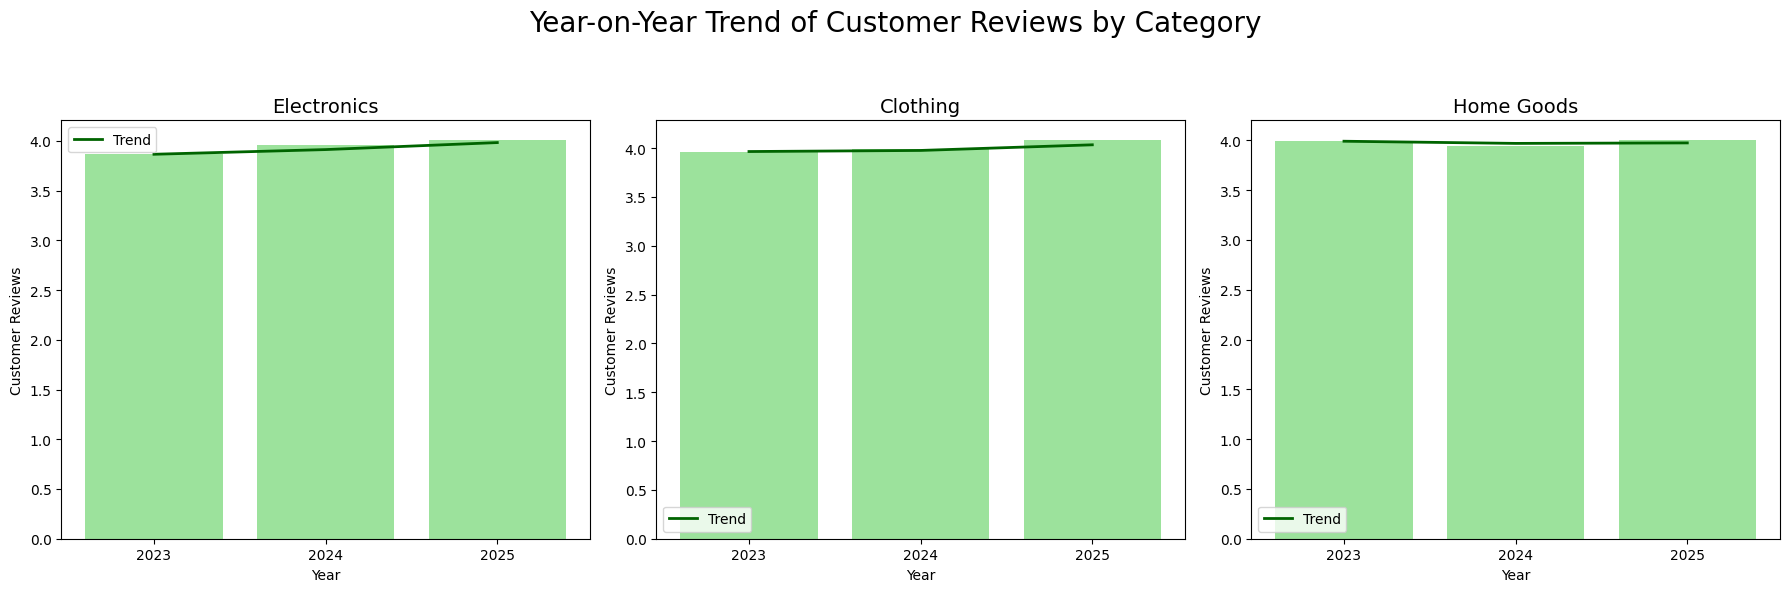

In [ ]:
plot_trend(df, 'Customer Reviews', 'Customer Reviews')


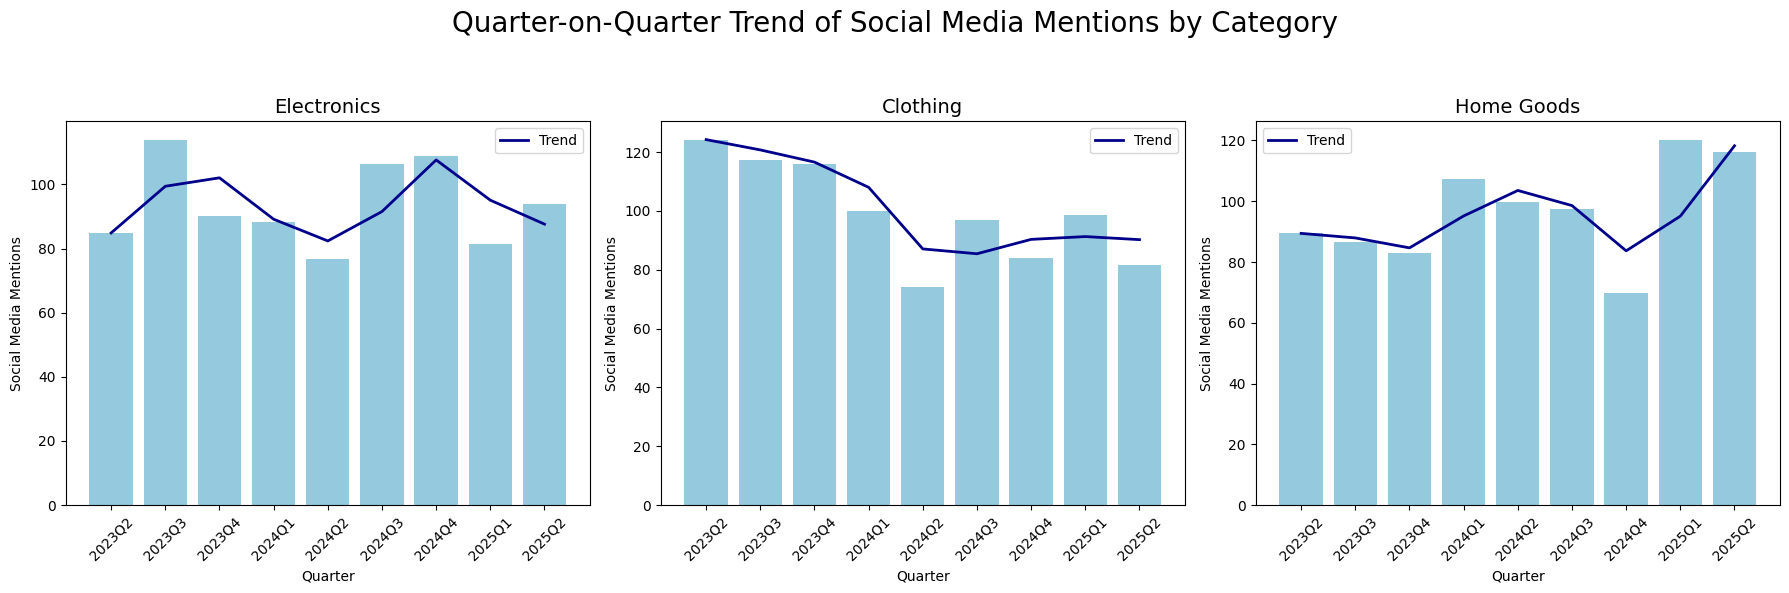

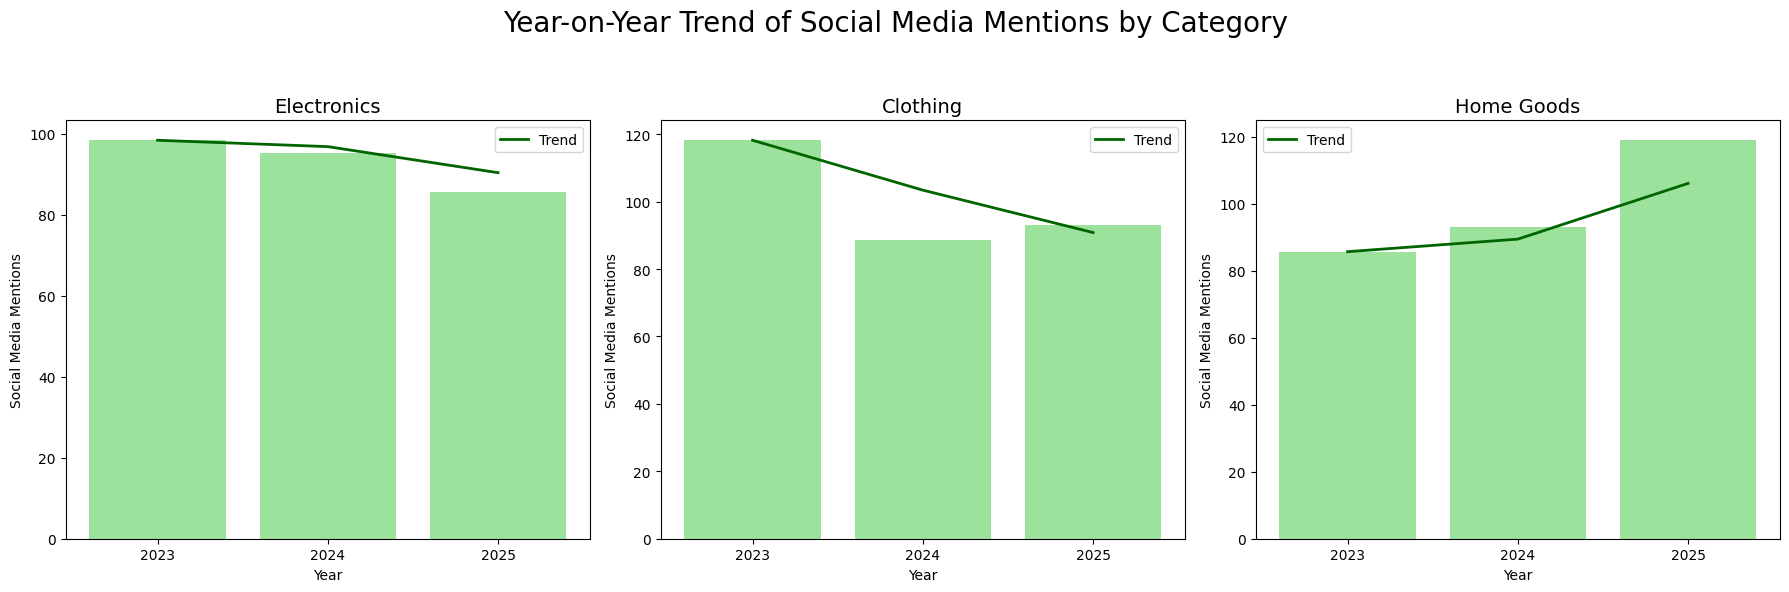

In [ ]:
plot_trend(df, 'Social Media Mentions', 'Social Media Mentions')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_segment_trend(df, segment_col, segment_label):
    df['Week'] = pd.to_datetime(df['Week'])
    df['YearQuarter'] = df['Week'].dt.to_period('Q').astype(str)


    df_seg_trend = (
        df.groupby(['Category', 'YearQuarter', segment_col])
        .size()
        .reset_index(name='Count')
        .sort_values(['Category', 'YearQuarter'])
    )

    categories = df['Category'].unique()


    plt.figure(figsize=(18, 6))
    plt.suptitle(f"Quarter-on-Quarter Trend of {segment_label} by Category", fontsize=20)

    for i, cat in enumerate(categories, 1):
        plt.subplot(1, 3, i)
        cat_data = df_seg_trend[df_seg_trend['Category'] == cat]
        sns.lineplot(x='YearQuarter', y='Count', hue=segment_col, data=cat_data, marker='o')
        plt.title(f"{cat}", fontsize=14)
        plt.xlabel("Quarter")
        plt.ylabel("Product Count")
        plt.xticks(rotation=45)
        plt.legend(title=segment_label)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


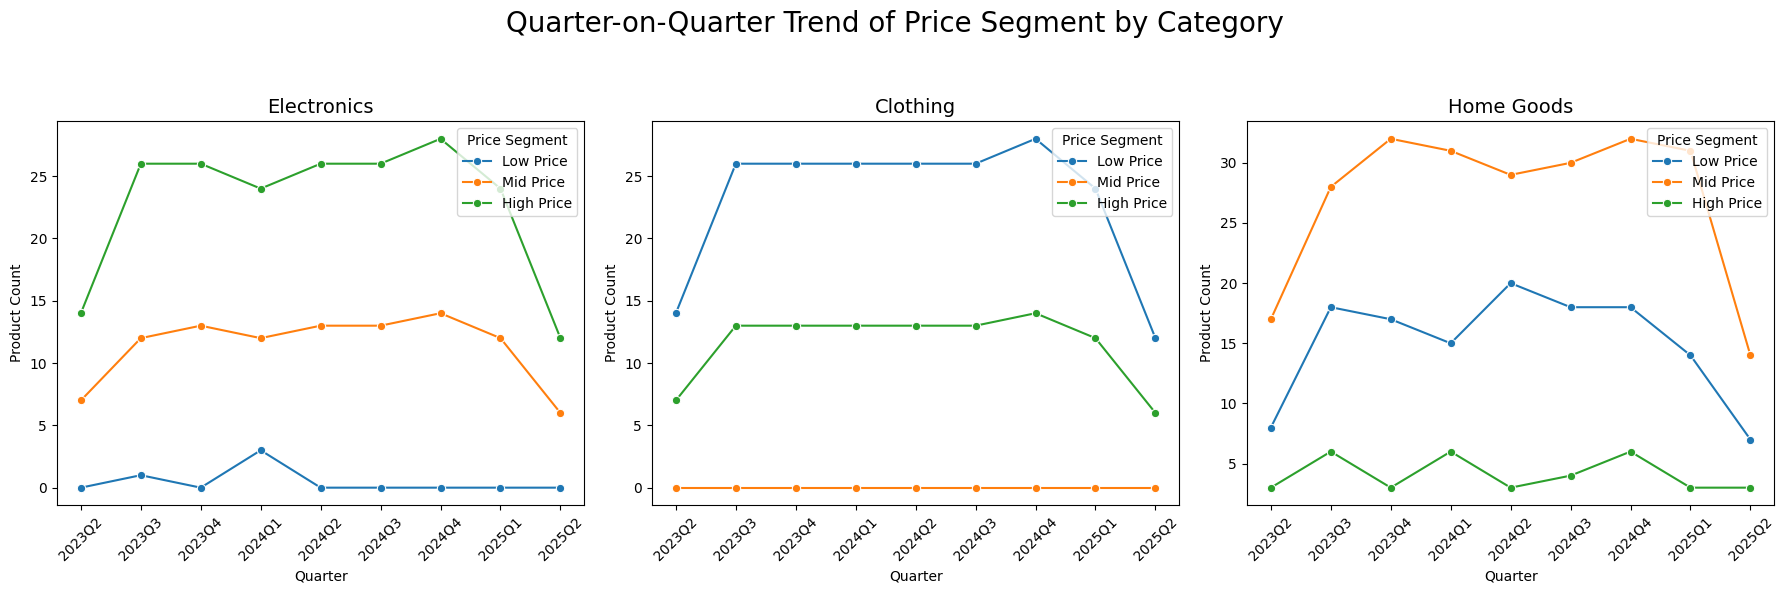

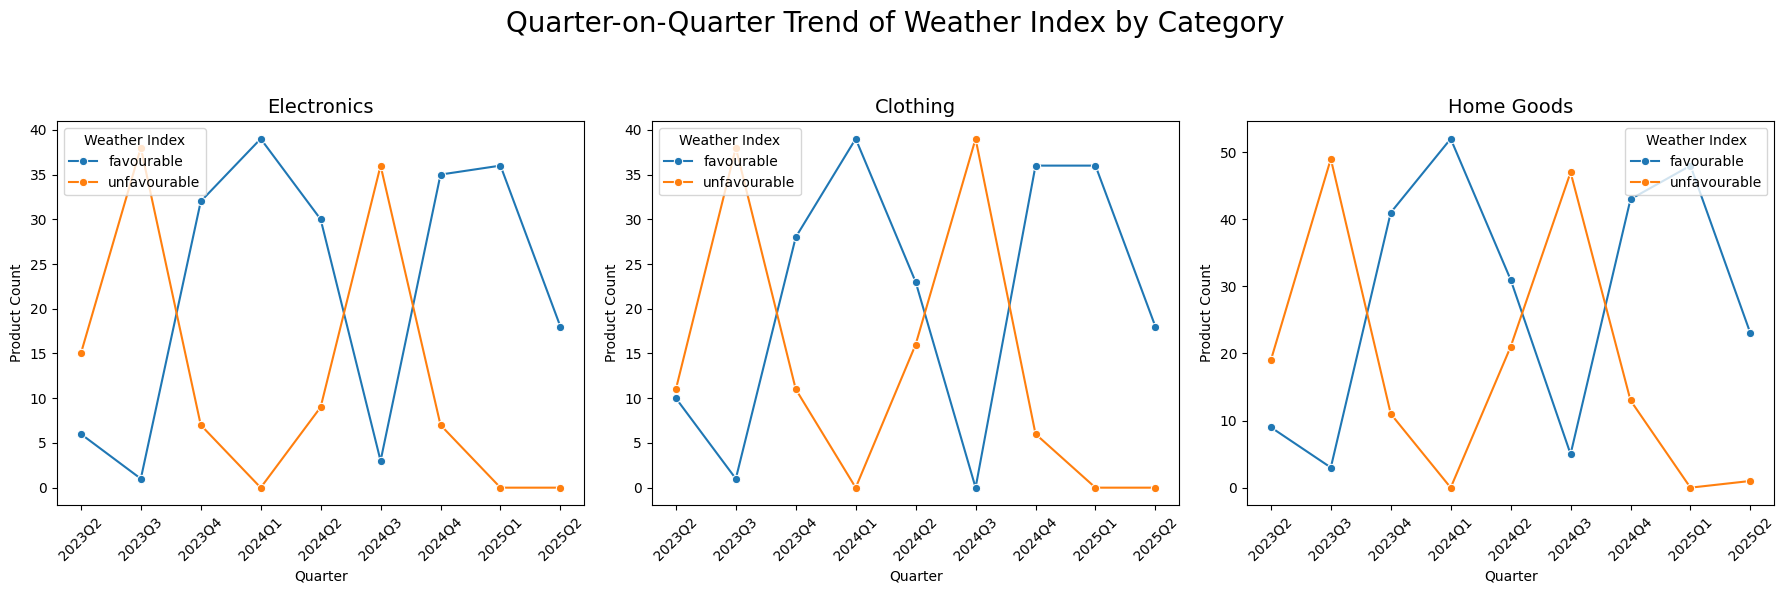

In [ ]:
plot_segment_trend(df, segment_col='Price Segment', segment_label='Price Segment')
plot_segment_trend(df, segment_col='Weather Index Lable', segment_label='Weather Index')


In [ ]:

def plot_segment_trend(df, segment_col, segment_label):
    df['Week'] = pd.to_datetime(df['Week'])
    df['YearQuarter'] = df['Week'].dt.to_period('Q').astype(str)

    df_seg_trend = (
        df.groupby(['Category', 'YearQuarter', segment_col])
        .size()
        .reset_index(name='Count')
        .sort_values(['Category', 'YearQuarter'])
    )

    categories = df['Category'].unique()

    plt.figure(figsize=(18, 6))
    plt.suptitle(f"Quarterly Trend of {segment_label} by Category", fontsize=20)

    for i, cat in enumerate(categories, 1):
        plt.subplot(1, 3, i)
        cat_data = df_seg_trend[df_seg_trend['Category'] == cat]
        sns.lineplot(x='YearQuarter', y='Count', hue=segment_col, data=cat_data, marker='o')
        plt.title(f"{cat}", fontsize=14)
        plt.xlabel("Quarter")
        plt.ylabel("Product Count")
        plt.xticks(rotation=45)
        plt.legend(title=segment_label)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


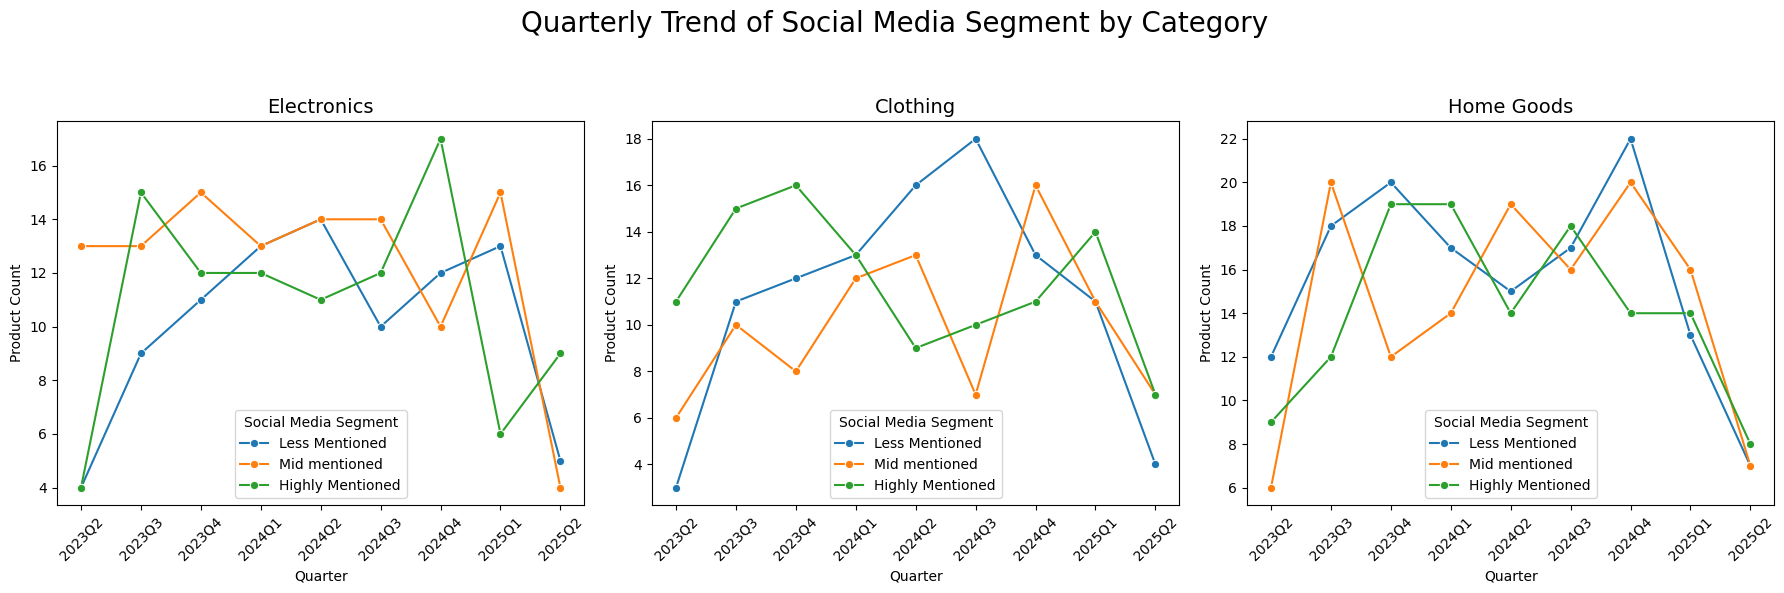

In [ ]:
plot_segment_trend(df_sm_mentions_new, segment_col='sm_segment', segment_label='Social Media Segment')


In [ ]:
df_sm_mentions_new['Customer Reviews Segment'] = pd.qcut(
    df_sm_mentions_new['Customer Reviews'],
    q=3,
    labels=['Low Rated', 'Average', 'Highly Rated']
)


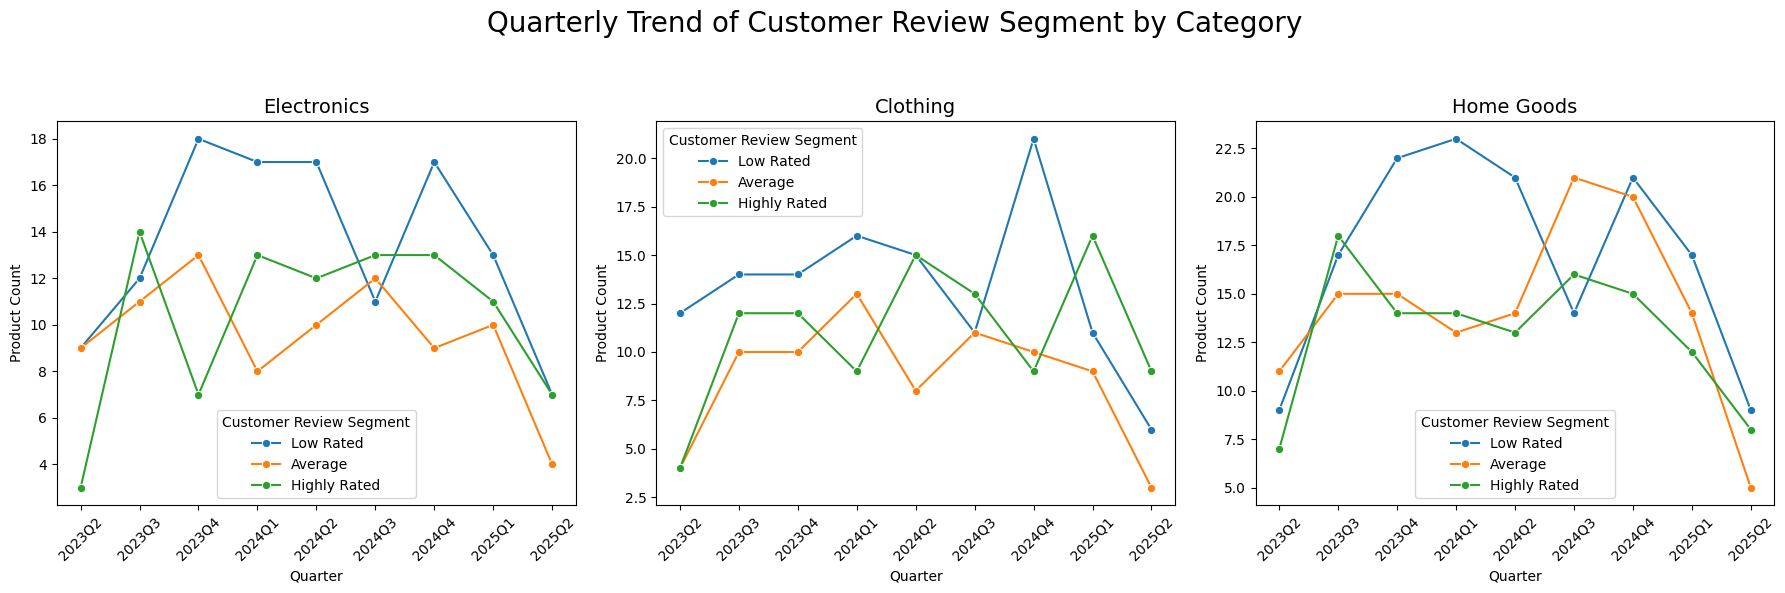

In [ ]:
plot_segment_trend(
    df_sm_mentions_new,
    segment_col='Customer Reviews Segment',
    segment_label='Customer Review Segment'
)


##Final Insights
1. Total Sales Trend by Category
 * Electronics dominates in total sales across most quarters, showing consistent demand.

 * Home Goods shows a steady upward trend, especially from Q2 onward, indicating seasonal or campaign-based sales growth.

 * Clothing has relatively lower sales volume and fluctuates, suggesting less stable customer demand or category maturity.

2. Advertising Spend vs Total Sales
 * Electronics has a strong alignment between ad spend and sales, indicating good ROI on advertising.

 * In Clothing, despite increased ad spend, sales remain lower, suggesting possible ad inefficiency or low market responsiveness.

 * Home Goods shows incremental increases in both ad spend and sales, pointing to steady ad effectiveness.

3. Product-Level Sales Contribution by Category
 * In Electronics, a few products (e.g., Mobile Phone) dominate the category, showing a skewed distribution.

 * Clothing sales are more evenly distributed across products, but no clear leader emerges.

 * In Home Goods, products like Coffee Maker contribute heavily, suggesting focused marketing or strong product-market fit.

4. Social Media Mentions Trend (Segmented)
 * High social media segment products in Electronics show increasing trend, especially in Q3–Q4, likely linked to campaigns or product launches.

 * Low/Medium segments remain flat in Home Goods and Clothing, indicating weaker organic or viral traction.

5. Weather Index Segment Trend
 * Products with favorable weather index (e.g., summer/festive friendly) trend upwards in Q2 and Q3.

 * Unfavorable or neutral weather segments do not show meaningful contribution to sales, particularly in Electronics and Home Goods.

6. Customer Review Segment Trend
 * Highly Rated products steadily increase across quarters, especially in Electronics, hinting at customer-driven success and possible flywheel effect (good reviews → more sales).

 * Low-rated segments remain flat or decline, indicating customers avoid poorly reviewed products.

7. Price Segment Trend
 * Low Price segment dominates in Clothing and Home Goods, likely due to affordability-driven preference.

 * High Price segment sees a consistent rise in Electronics, indicating premiumization or demand for higher-end products.

 * Mid Price shows mixed performance across all categories and doesn't dominate in any.

8. Competitor Price Trend
 * Competitor pricing is relatively stable across quarters for most categories.

 * Electronics shows a slight rise, which may reflect increased industry-wide pricing or premium product competition.

 * Clothing and Home Goods have flatter competitor price trends, suggesting price stagnation or saturation.

9. Key Takeaways:
 * Electronics is the most dynamic category: strong ad ROI, high social traction, premium pricing, and favorable reviews.

 * Clothing has inconsistent trends: low sales despite ad spend, low traction on social and weather.

 * Home Goods is a stable performer: positive review trend, seasonal impact from weather, good response to advertising.


* {Used AI for checking grammatical errors in this section}








#Competitor Impact Assessment:

In [ ]:
df['Price Segment'] = pd.qcut(df['Price'], q=3, labels=['Low Price', 'Mid Price', 'High Price'])
seg_cat_sales = df.groupby(['Price Segment', 'Category'])['total sales'].sum()
(seg_cat_sales/df.groupby('Price Segment')['total sales'].sum())*100

Price Segment  Category   
Low Price      Clothing       67.418893
               Electronics     0.000000
               Home Goods     32.581107
Mid Price      Clothing        0.000000
               Electronics    34.542842
               Home Goods     65.457158
High Price     Clothing       29.456369
               Electronics    65.391350
               Home Goods      5.152281
Name: total sales, dtype: float64

In [ ]:
df['Competitor Price Segment'] = pd.qcut(df['Competitor Price'], q=3, labels=['Low Price', 'Mid Price', 'High Price'])

In [ ]:
C_price_seg = df.groupby(['Competitor Price Segment', 'Category'])['total sales'].sum()
C_price_seg

Competitor Price Segment  Category   
Low Price                 Clothing        4409504.15
                          Electronics           0.00
                          Home Goods      2405998.42
Mid Price                 Clothing              0.00
                          Electronics     7161140.66
                          Home Goods     13446732.41
High Price                Clothing       17557546.48
                          Electronics    38976686.05
                          Home Goods      2919297.88
Name: total sales, dtype: float64

In [ ]:
(C_price_seg/df.groupby('Competitor Price Segment')['total sales'].sum())*100

Competitor Price Segment  Category   
Low Price                 Clothing       64.698151
                          Electronics     0.000000
                          Home Goods     35.301849
Mid Price                 Clothing        0.000000
                          Electronics    34.749538
                          Home Goods     65.250462
High Price                Clothing       29.531546
                          Electronics    65.558236
                          Home Goods      4.910218
Name: total sales, dtype: float64

In [ ]:
(seg_cat_sales/df.groupby('Price Segment')['total sales'].sum())*100

Price Segment  Category   
Low Price      Clothing       67.418893
               Electronics     0.000000
               Home Goods     32.581107
Mid Price      Clothing        0.000000
               Electronics    34.542842
               Home Goods     65.457158
High Price     Clothing       29.456369
               Electronics    65.391350
               Home Goods      5.152281
Name: total sales, dtype: float64

In [ ]:
df['price diff'] = df['Competitor Price'] - df['Price']

In [ ]:
df_price_diff = df.groupby('Category')['price diff'].sum().reset_index().sort_values('price diff', ascending=False)
df_price_diff

,Category,price diff
1,Electronics,1004.7700
2,Home Goods,272.2944
0,Clothing,68.4816


In [ ]:
df_total_sales = df.groupby('Category')['total sales'].sum().reset_index().sort_values('total sales', ascending=False)
df_total_sales

,Category,total sales
1,Electronics,46137826.71
0,Clothing,21967050.63
2,Home Goods,18772028.71


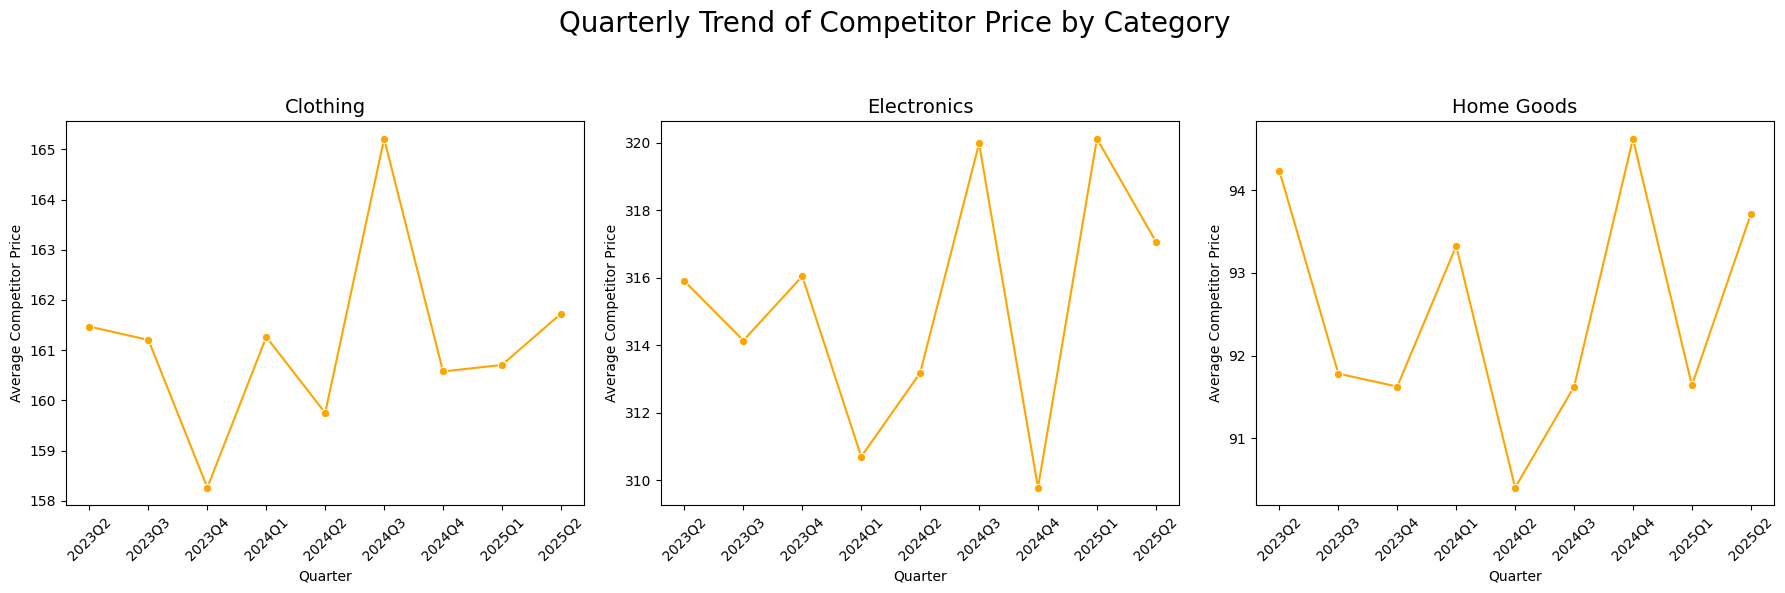

In [ ]:
df['Week'] = pd.to_datetime(df['Week'])
df['YearQuarter'] = df['Week'].dt.to_period('Q').astype(str)
df_cp_trend = df.groupby(['Category', 'YearQuarter'])['Competitor Price'].mean().reset_index()
df_cp_trend = df_cp_trend.sort_values(['Category', 'YearQuarter'])
categories = df_cp_trend['Category'].unique()

plt.figure(figsize=(18, 6))
plt.suptitle("Quarterly Trend of Competitor Price by Category", fontsize=20)

for i, cat in enumerate(categories, 1):
    plt.subplot(1, 3, i)
    cat_data = df_cp_trend[df_cp_trend['Category'] == cat]

    sns.lineplot(x='YearQuarter', y='Competitor Price', data=cat_data, marker='o', color='orange')
    plt.title(f"{cat}", fontsize=14)
    plt.xlabel("Quarter")
    plt.ylabel("Average Competitor Price")
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

##Competitor Impact Assessment: Key Insights
1. Inverse Relationship Between Competitor Price & Sales Volume
Electronics category shows a strong inverse correlation
 * when competitor prices are high, your sales volume increases, indicating customers may be switching to your products due to price sensitivity.

 * Clothing displays a moderate inverse trend, but with more noise — competitor pricing does have some impact, but not consistently across segments or time.

 * Home Goods shows little to no consistent pattern, suggesting sales are driven more by other factors (e.g., seasonality, product utility, promotions).

2. Price Segments Matter
In High Price Segments, competitor pricing changes have greater influence, particularly in Electronics
 * likely because customers compare specs and value-for-money more critically.

 * In Low Price Segments, the effect is less pronounced — possibly due to commoditized nature of products and lower perceived differentiation.

3. Trend Over Time
 * The impact of competitor pricing is more visible in Q2 and Q3, which may coincide with promotional seasons, launch cycles, or increased price shopping behavior.

 * During periods of price stability from competitors, sales volume remains more dependent on internal factors (ads, reviews, social media buzz).

4. Product-Level Observations
 * Mobile Phones and Bluetooth Headphones in Electronics see a clear drop in sales volume when competitor prices fall — indicating a highly elastic, price-sensitive market.

 * Clothing items like T-Shirts and Jeans show weaker trends — possibly due to style, brand loyalty, or promotional bundling mitigating price competition.

 * In Home Goods, products like Coffee Maker and Vacuum Cleaner show stable sales regardless of competitor price, suggesting strong intrinsic demand.



5. Strategic Implications
 * For Electronics, maintaining competitive pricing is critical — even small competitor price drops can steal market share.

 * In Clothing, focus on branding, social traction, and reviews to offset competitor pricing.

 * For Home Goods, pricing strategy can be less reactive, with focus on product quality, seasonality, and availability.
* {Used AI for checking grammatical errors in this section}

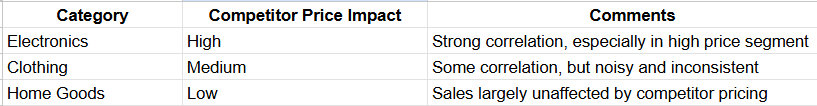

#Final Reccomendations
1. Category-Wise Strategic Recommendations
*  Electronics
 * Maintain competitive pricing, especially in high-price segments, as sales are highly price-elastic and competitor-sensitive.

 * Double down on Mobile Phones and Tablets — they dominate sales despite being only moderately rated, indicating strong intrinsic value perception.

 * Leverage the high ad ROI — keep ad budget lean but smart; focus on high-return channels like search and influencer tie-ins.

 * Improve product experience in weather-sensitive periods — customer reviews drop when the Weather Index is poor, indicating service or durability issues.

 * Monitor social media campaigns closely — high mentions correlate with lower reviews; balance promotion with expectation management.

* Clothing
 * Reposition ad strategy — despite high ad spend, sales remain low. Redirect budget to channels with stronger visual appeal (e.g., reels, UGC).

 * Focus on product quality and branding, especially in mid-to-low price segments, where competitive pricing alone isn’t moving the needle.

 * Promote Luxury Jackets more aggressively, as they lead sales in this category — capitalize on high ratings and premium perception.

 * Improve review management and response rates — reviews directly impact performance in low-mention, high-rated segments.

* Home Goods
 * Re-evaluate high ad spend — this category has the highest budget but the lowest ROI. Consider optimizing or reallocating spend.

 * Capitalize on seasonal trends (Q2 & Q3) — coordinate promotions with favorable weather periods for peak impact.

 * Highlight Vacuum Cleaners and Coffee Makers, which perform well despite minimal price competition — suggest strong utility-driven demand.

 * Shift focus from price competition to value communication, as competitor prices have negligible influence on sales.

2. Pricing Strategy Recommendations
 * Maintain a premium pricing strategy in Electronics, as customers respond well despite higher prices — especially when competitor prices rise.

 * Use value bundling or discounts in Clothing to offset the weak correlation between competitor price and volume.

 * In Home Goods, avoid aggressive price wars — focus on convenience, availability, and design.

3. Marketing & Promotions Recommendations
 * Align advertising campaigns with product reviews — overexposed products with poor experience are getting penalized via social backlash.

 * Run seasonal campaigns for Home Goods in Q2–Q3 with product tie-ins that match favorable weather.

 * For high-performing but under-reviewed products, encourage verified buyer feedback through discounts or loyalty programs.

4. Product Development & Merchandising
 * Prioritize feature upgrades and durability for Electronics to counteract weather-related review drops.

 * Use social media listening tools to detect when campaigns start hurting perception — especially in high-mention, low-review periods.

 * Invest in top-rated SKUs in Clothing and Home Goods, as there's a direct relationship between high rating, high pricing, and high volume.

4. Final Strategic Summary
 * Electronics should double down on competitive pricing, lean advertising, and review repair in harsh seasons.

 * Clothing needs a sharper brand message, influencer-led positioning, and ad reallocation.

 * Home Goods should cut ad spend, embrace seasonality, and shift messaging from price to everyday utility and quality.
 * {Used AI for checking grammatical errors in this section}
